This notebook is for making timeseries plots from composites corresponding to extreme NAO events. 

In [1]:
import numpy as np
import xarray as xr
import cmaps
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import warnings
warnings.filterwarnings("ignore")

## Heat Budget timeseries and overturning anomalies for NAO+ events

1. Timeseris of area-integrated heat budget terms (subpolar region)
2. Timeseries of SST' and MLD' (subpolar region)
3. Timeseries of $\psi_{max}'$ at 45N, 55N (with decomposition into ekman and geostrophic components)
4. Timeseries of HT' at 45N, 55N (at different depths and density layers) 

In [2]:
# read overturning drift data for climatology plots

ppdir = "/gws/nopw/j04/snapdragon/hkhatri/Data_Drift/psi_sigma/"

ds_drift = []

for r in range(0,10):
    
    ds1 = []
    
    for lead_year in range(0, 11):
        
        d = xr.open_dataset(ppdir + "Drift_Overturning_r" + str(r+1) + "_Lead_Year_" +
                            str(lead_year + 1) + ".nc", decode_times= False)
        
        d = d.assign(time = np.arange(lead_year*12, 12*lead_year + 
                                      np.minimum(12, len(d['time'])), 1))
        
        ds1.append(d)
        
    ds1 = xr.concat(ds1, dim='time')
    
    ds_drift.append(ds1)
    
ds_drift = xr.concat(ds_drift, dim='r')

print(ds_drift)

<xarray.Dataset>
Dimensions:                           (r: 10, time: 125, j_c: 450, lev: 75,
                                       sigma0: 48, sigma0_outer: 49,
                                       lev_outer: 76, lat: 153)
Coordinates:
  * j_c                               (j_c) int32 699 700 701 ... 1146 1147 1148
  * lev                               (lev) float64 0.5058 1.556 ... 5.902e+03
  * sigma0                            (sigma0) float64 16.0 18.0 ... 29.5 30.5
  * sigma0_outer                      (sigma0_outer) float64 15.0 17.0 ... 31.0
  * lev_outer                         (lev_outer) float64 0.0 ... 6.004e+03
  * lat                               (lat) float64 0.2778 0.8333 ... 84.72
  * time                              (time) int64 0 1 2 3 4 ... 121 122 123 124
Dimensions without coordinates: r
Data variables: (12/30)
    latitude                          (r, time, j_c) float32 4.121 ... 75.9
    Overturning_z                     (r, time, lev, j_c) float32 6.633e+05

In [3]:
data_dir = "/gws/nopw/j04/snapdragon/hkhatri/Data_Composite/NAO_hpa/Bootstrap_Confidence/"

file_list = ['Bootstrap_NAOp_Diagnostics_Area_Integrated.nc', 'Bootstrap_NAOp_Overturning_MHT_timeseries.nc']

ds_NAOp = []

for file in file_list:
    
    d = xr.open_dataset(data_dir + file)
    ds_NAOp.append(d)
    
ds_NAOp = xr.merge(ds_NAOp)

ds_NAOp = ds_NAOp.assign_coords(j_c=ds_NAOp['latitude'])

file_list = ['Bootstrap_NAOn_Diagnostics_Area_Integrated.nc', 'Bootstrap_NAOn_Overturning_MHT_timeseries.nc']

ds_NAOn = []

for file in file_list:
    
    d = xr.open_dataset(data_dir + file)
    ds_NAOn.append(d)
    
ds_NAOn = xr.merge(ds_NAOn)

ds_NAOn = ds_NAOn.assign_coords(j_c=ds_NAOn['latitude'])

#ds_NAOp = xr.open_dataset(data_dir + 'Bootstrap_NAOp_Diagnostics_Area_Integrated.nc')
#ds_NAOn = xr.open_dataset(data_dir + 'Bootstrap_NAOn_Diagnostics_Area_Integrated.nc')

In [4]:
rng_nl = ds_drift['sigma0_outer'].values[1:] * np.arange(0, len(ds_drift['sigma0']))**2

rng_nl

array([0.00000e+00, 1.90000e+01, 8.00000e+01, 1.89000e+02, 3.52000e+02,
       5.75000e+02, 8.35200e+02, 1.14660e+03, 1.51040e+03, 1.92780e+03,
       2.40000e+03, 2.92820e+03, 3.51360e+03, 4.15740e+03, 4.86080e+03,
       5.62500e+03, 6.45120e+03, 7.34060e+03, 8.29440e+03, 9.31380e+03,
       1.04000e+04, 1.15101e+04, 1.26808e+04, 1.39127e+04, 1.52064e+04,
       1.65625e+04, 1.79816e+04, 1.94643e+04, 2.10112e+04, 2.26229e+04,
       2.43000e+04, 2.60431e+04, 2.78528e+04, 2.97297e+04, 3.16744e+04,
       3.36875e+04, 3.57696e+04, 3.79213e+04, 4.01432e+04, 4.24359e+04,
       4.48000e+04, 4.74042e+04, 5.00976e+04, 5.28814e+04, 5.57568e+04,
       5.87250e+04, 6.34800e+04, 6.84790e+04])

In [5]:
rng_nl = ds_drift['sigma0'].values * np.arange(0, len(ds_drift['sigma0']))**2

rng_nl

array([0.000000e+00, 1.800000e+01, 7.800000e+01, 1.845000e+02,
       3.440000e+02, 5.625000e+02, 8.316000e+02, 1.141700e+03,
       1.504000e+03, 1.919700e+03, 2.390000e+03, 2.916100e+03,
       3.499200e+03, 4.140500e+03, 4.841200e+03, 5.602500e+03,
       6.425600e+03, 7.311700e+03, 8.262000e+03, 9.277700e+03,
       1.036000e+04, 1.148805e+04, 1.265660e+04, 1.388625e+04,
       1.517760e+04, 1.653125e+04, 1.794780e+04, 1.942785e+04,
       2.097200e+04, 2.258085e+04, 2.425500e+04, 2.599505e+04,
       2.780160e+04, 2.967525e+04, 3.161660e+04, 3.362625e+04,
       3.570480e+04, 3.785285e+04, 4.007100e+04, 4.235985e+04,
       4.472000e+04, 4.723610e+04, 4.992120e+04, 5.269650e+04,
       5.556320e+04, 5.852250e+04, 6.242200e+04, 6.737450e+04])

In [6]:
print(ds_drift.sigma0, ds_drift.sigma0_outer)

<xarray.DataArray 'sigma0' (sigma0: 48)>
array([16.  , 18.  , 19.5 , 20.5 , 21.5 , 22.5 , 23.1 , 23.3 , 23.5 , 23.7 ,
       23.9 , 24.1 , 24.3 , 24.5 , 24.7 , 24.9 , 25.1 , 25.3 , 25.5 , 25.7 ,
       25.9 , 26.05, 26.15, 26.25, 26.35, 26.45, 26.55, 26.65, 26.75, 26.85,
       26.95, 27.05, 27.15, 27.25, 27.35, 27.45, 27.55, 27.65, 27.75, 27.85,
       27.95, 28.1 , 28.3 , 28.5 , 28.7 , 28.9 , 29.5 , 30.5 ])
Coordinates:
  * sigma0   (sigma0) float64 16.0 18.0 19.5 20.5 21.5 ... 28.7 28.9 29.5 30.5
Attributes:
    units:      kg/m^3
    long_name:  Potential density with reference to ocean surface - 1000. <xarray.DataArray 'sigma0_outer' (sigma0_outer: 49)>
array([15. , 17. , 19. , 20. , 21. , 22. , 23. , 23.2, 23.4, 23.6, 23.8, 24. ,
       24.2, 24.4, 24.6, 24.8, 25. , 25.2, 25.4, 25.6, 25.8, 26. , 26.1, 26.2,
       26.3, 26.4, 26.5, 26.6, 26.7, 26.8, 26.9, 27. , 27.1, 27.2, 27.3, 27.4,
       27.5, 27.6, 27.7, 27.8, 27.9, 28. , 28.2, 28.4, 28.6, 28.8, 29. , 30. ,
       31. ])
Coo

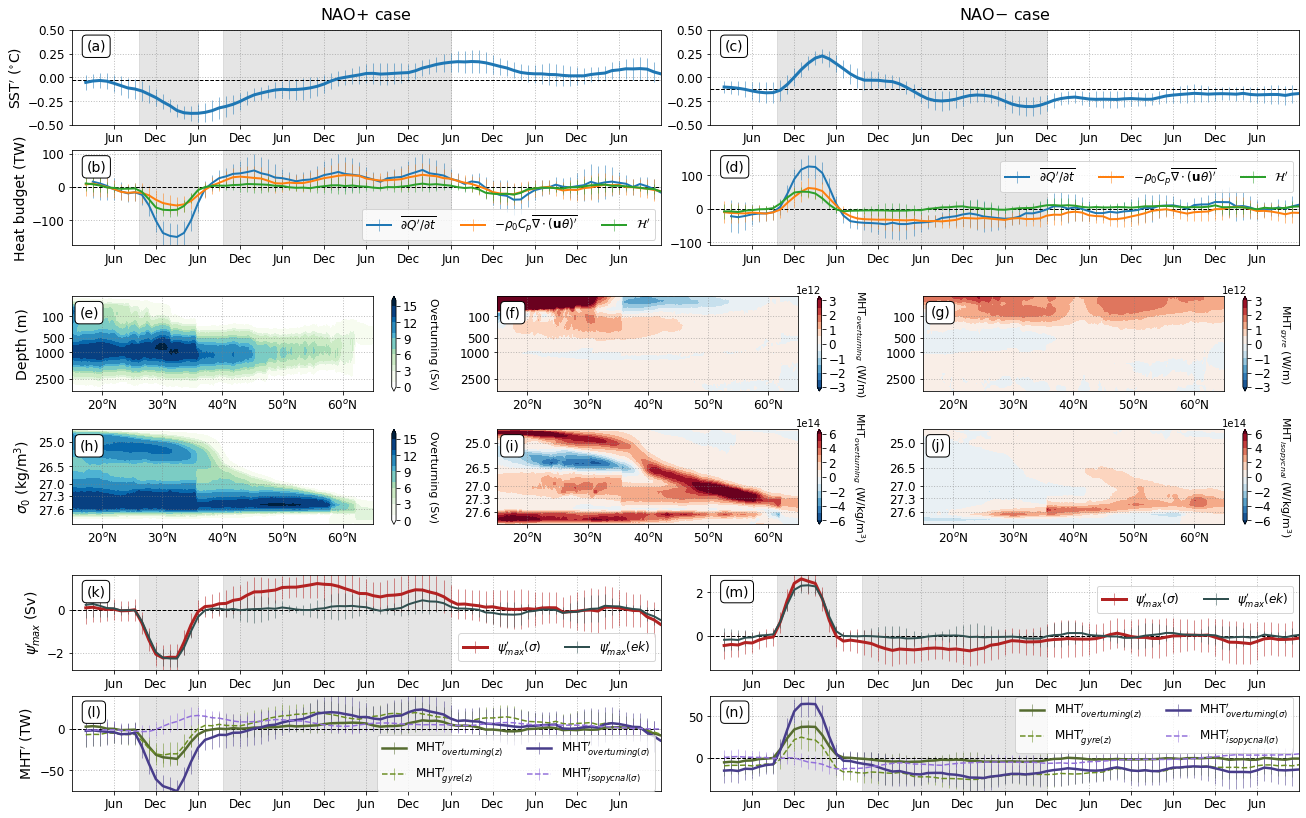

In [8]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

cfd_per = 1.98 # z-val for confidence interval 
                # (1.289 for 80%, 1.658 for 90%, 1.98 for 95%, 2.617 for 99% for deg. freddom = 120)
fs = 12 # font size

grid1 = plt.GridSpec(6, 6, wspace=0.3, hspace=0.4)
fig = plt.figure(figsize=[22,14])

props = dict(boxstyle='round', facecolor='white')

# ----------------------------------------------------------------- #
# --------- Overturning and heat tranposrt climatology ------------- #
# ----------------------------------------------------------------- #

dz = ds_drift['lev_outer'].diff(dim = 'lev_outer').rename({'lev_outer':'lev'}).drop('lev')
dz = dz.assign_coords(lev = ds_drift['lev'])

dsigma = ds_drift['sigma0_outer'].diff(dim = 'sigma0_outer').rename({'sigma0_outer':'sigma0'}).drop('sigma0')
dsigma = dsigma.assign_coords(sigma0 = ds_drift['sigma0'])

lat = ds_drift['latitude'].isel(r=0,time=0)

tmp = (ds_drift['Overturning_z'] - ds_drift['Overturning_z_barotropic']).mean(['r','time']).isel(j_c=slice(0,340)) / 1e6
tmp = tmp.assign_coords(j_c=lat.isel(j_c=slice(0,340)))

#tmp = tmp.drop('lev').assign_coords(lev = ds_drift['lev'].values + dz.values * 0.5)
tmp = tmp.drop('lev').assign_coords(lev = (ds_drift['lev_outer'].values[1:])**0.4) 

ax = fig.add_subplot(grid1[2, 0:2])
p = tmp.plot.contourf(ax=ax, x='j_c', y='lev', levels = 17, vmin = 0., vmax = 16,
                      cmap=cmaps.CBR_wet, add_labels=False, add_colorbar=False, extend='both')
ax.set_ylabel('Depth (m)', fontsize=fs+2)

plt.xticks(np.arange(20,61,10), [r'$20^o$N', r'$30^o$N', r'$40^o$N', r'$50^o$N', r'$60^o$N'], fontsize = fs);
#plt.yticks(np.arange(0,4500,1000), [r'0', r'1', r'2', r'3', r'4'])
#ax.set_ylim([0., 3000.])
plt.yticks((np.array([100., 500., 1000., 2500.]))**0.4, [r'100', r'500', r'1000', r'2500'])
ax.set_ylim([1., 3500.**0.4])
ax.set_xlim([15., 65.])
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)

cb = fig.colorbar(p, ax=ax, ticks=[0, 3, 6, 9, 12, 15], extend='both') #, orientation="horizontal", pad=0.3)
cb.ax.tick_params(labelsize=fs) #, rotation = 90)
cb.set_label('Overturning (Sv)', rotation=270, labelpad=20, size=fs-1) #, fontsize=fs, rotation=90)

#ax.set_title('Overturning (Sv)', fontsize=fs+2)
plt.gca().invert_yaxis()
plt.yticks(fontsize = fs);
plt.xticks(fontsize = fs);
ax.text(0.025, 0.9, '(e)', transform=ax.transAxes, fontsize=fs+2, verticalalignment='top', bbox=props);

#bbox=plt.gca().get_position(); offset=.025;
#plt.gca().set_position([bbox.x0 , bbox.y0 + offset*0.5, bbox.x1-bbox.x0 - offset*0.0, bbox.y1 - bbox.y0])

tmp = ds_drift['MHT_overturning_z'].mean(['r','time']).isel(j_c=slice(0,340)) /dz
tmp = tmp.assign_coords(j_c=lat.isel(j_c=slice(0,340)))

tmp = tmp.drop('lev').assign_coords(lev = (ds_drift['lev'].values)**0.4) 

ax = fig.add_subplot(grid1[2, 2:4])
p = tmp.plot.contourf(ax=ax, x='j_c', y='lev', levels = 13, vmin = -3e12, vmax = 3e12,
                      cmap=cmaps.MPL_RdBu_r, add_labels=False, add_colorbar=False, extend='both')
#ax.set_ylabel('Depth (km)', fontsize=12)
cb = fig.colorbar(p, ax=ax, extend='both') #, orientation="horizontal", pad=0.3)
cb.ax.tick_params(labelsize=fs)
#ax.set_title('Heat Transport (W$\cdot$m$^{-1}$)', fontsize=fs+2)
cb.set_label('MHT$_{overturning}$ (W/m)', rotation=270, labelpad=20, size=fs - 1)
#cb.set_label('Heat Transport (W/m)', rotation=270, horizontalalignment='right')
plt.xticks(np.arange(20,61,10), [r'$20^o$N', r'$30^o$N', r'$40^o$N', r'$50^o$N', r'$60^o$N'], fontsize = fs);
plt.yticks((np.array([100., 500., 1000., 2500.]))**0.4, [r'100', r'500', r'1000', r'2500'])
ax.set_ylim([1., 3500.**0.4])
ax.set_xlim([15., 65.])
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
plt.gca().invert_yaxis()
plt.yticks(fontsize = fs);
plt.xticks(fontsize = fs);
ax.text(0.025, 0.9, '(f)', transform=ax.transAxes, fontsize=fs+2, verticalalignment='top', bbox=props);

#bbox=plt.gca().get_position(); offset=.025;
#plt.gca().set_position([bbox.x0 , bbox.y0 + offset*0.5, bbox.x1-bbox.x0 - offset*0.0, bbox.y1 - bbox.y0])

tmp = ((ds_drift['MHT_z'] - ds_drift['MHT_z_baro'] - ds_drift['MHT_overturning_z_baro_v'] - 
        ds_drift['MHT_overturning_z_baro_theta'] -
        ds_drift['MHT_overturning_z'])).mean(['r','time']).isel(j_c=slice(0,340)) / dz
tmp = tmp.assign_coords(j_c=lat.isel(j_c=slice(0,340)))

tmp = tmp.drop('lev').assign_coords(lev = (ds_drift['lev'].values)**0.4) 

ax = fig.add_subplot(grid1[2, 4:6])
p = tmp.plot.contourf(ax=ax, x='j_c', y='lev', levels = 13, vmin = -3e12, vmax = 3e12,
                      cmap=cmaps.MPL_RdBu_r, add_labels=False, add_colorbar=False, extend='both')
#ax.set_ylabel('Depth (km)', fontsize=12)
cb = fig.colorbar(p, ax=ax, extend='both') #, orientation="horizontal", pad=0.3)
cb.ax.tick_params(labelsize=fs) #, rotation = 90)
#ax.set_title('Heat Transport (W$\cdot$m$^{-1}$)', fontsize=fs+2)
cb.set_label('MHT$_{gyre}$ (W/m)', rotation=270, labelpad=20, size=fs - 1)
plt.xticks(np.arange(20,61,10), [r'$20^o$N', r'$30^o$N', r'$40^o$N', r'$50^o$N', r'$60^o$N'], fontsize = fs);
plt.yticks((np.array([100., 500., 1000., 2500.]))**0.4, [r'100', r'500', r'1000', r'2500'])
ax.set_ylim([1., 3500.**0.4])
ax.set_xlim([15., 65.])
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
plt.gca().invert_yaxis()
plt.yticks(fontsize = fs);
plt.xticks(fontsize = fs);
ax.text(0.025, 0.9, '(g)', transform=ax.transAxes, fontsize=fs+2, verticalalignment='top', bbox=props);

#bbox=plt.gca().get_position(); offset=.025;
#plt.gca().set_position([bbox.x0 , bbox.y0 + offset*0.5, bbox.x1-bbox.x0 - offset*0.0, bbox.y1 - bbox.y0])

tmp = (ds_drift['Overturning_sigma'] - ds_drift['Overturning_sigma_barotropic']).mean(['r','time']).isel(j_c=slice(0,340)) / 1e6
tmp = tmp.assign_coords(j_c=lat.isel(j_c=slice(0,340)))
rng_nl = ds_drift['sigma0_outer'].values[1:] * np.arange(0, len(ds_drift['sigma0']))**2
tmp = tmp.drop('sigma0').assign_coords(sigma0 = rng_nl)

ax = fig.add_subplot(grid1[3, 0:2])
p = tmp.plot.contourf(ax=ax, x='j_c', y='sigma0', levels = 17, vmin = 0, vmax = 16.,
                      cmap=cmaps.CBR_wet, add_labels=False, add_colorbar=False, extend='both')
ax.set_ylabel(r'$\sigma_0$ (kg/m$^3$)', fontsize=fs+2)
cb = fig.colorbar(p, ax=ax, extend='both', ticks=[0, 3, 6, 9, 12, 15]) #, orientation="horizontal", pad=0.3)
cb.ax.tick_params(labelsize=fs) #, rotation = 90)
#ax.set_title('Overturning (Sv)', fontsize=fs+2)
cb.set_label('Overturning (Sv)', rotation=270, labelpad=20, size=fs-1)
plt.xticks(np.arange(20,61,10), [r'$20^o$N', r'$30^o$N', r'$40^o$N', r'$50^o$N', r'$60^o$N'], fontsize = fs);
ax.set_xlim([15., 65.])
ax.set_ylim([0., 4.24359e+04])
plt.yticks([rng_nl[15], rng_nl[25], rng_nl[30], rng_nl[33], rng_nl[36]], [25.0, 26.5, 27.0, 27.3, 27.6])
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
plt.gca().invert_yaxis()
plt.yticks(fontsize = fs);
plt.xticks(fontsize = fs);
ax.text(0.025, 0.9, '(h)', transform=ax.transAxes, fontsize=fs+2, verticalalignment='top', bbox=props);

tmp = ds_drift['MHT_overturning_sigma'].mean(['r','time']).isel(j_c=slice(0,340)) / dsigma
tmp = tmp.assign_coords(j_c=lat.isel(j_c=slice(0,340)))
rng_nl = ds_drift['sigma0'].values * np.arange(0, len(ds_drift['sigma0']))**2
tmp = tmp.drop('sigma0').assign_coords(sigma0 = rng_nl)

ax = fig.add_subplot(grid1[3, 2:4])
p = tmp.plot.contourf(ax=ax, x='j_c', y='sigma0', levels = 13, vmin = -600e12, vmax = 600.e12,
                      cmap=cmaps.MPL_RdBu_r, add_labels=False, add_colorbar=False, extend='both')
#ax.set_ylabel(r'$\sigma_0$ (kg/m$^3$)', fontsize=12)
cb = fig.colorbar(p, ax=ax, extend='both') #, orientation="horizontal", pad=0.3)
cb.ax.tick_params(labelsize=fs) #, rotation = 90)
#ax.set_title(r'Heat Transport (W$\cdot$kg$^{-1}\cdot$m$^{-3}$)', fontsize=fs+2)
cb.set_label('MHT$_{overturning}$ (W/kg/m$^{3}$)', rotation=270, labelpad=20, size=fs-1)
#ax.set_ylabel(r'$\sigma_0$ (kg/m$^3$)', fontsize=12)
plt.xticks(np.arange(20,61,10), [r'$20^o$N', r'$30^o$N', r'$40^o$N', r'$50^o$N', r'$60^o$N'], fontsize = fs);
ax.set_xlim([15., 65.])
ax.set_ylim([0., 4.235985e+04])
plt.yticks([15.5**2 * 25., 25.5**2*26.5, 30.5**2*27, 33.5**2*27.3, 36.5**2*27.6], [25.0, 26.5, 27.0, 27.3, 27.6])
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
plt.gca().invert_yaxis()
plt.yticks(fontsize = fs);
plt.xticks(fontsize = fs);
ax.text(0.025, 0.9, '(i)', transform=ax.transAxes, fontsize=fs+2, verticalalignment='top', bbox=props);


tmp = (ds_drift['MHT_sigma'] - ds_drift['MHT_sigma_baro'] - ds_drift['MHT_overturning_sigma_baro_v'] 
       - ds_drift['MHT_overturning_sigma_baro_theta'] 
       - ds_drift['MHT_overturning_sigma']).mean(['r','time']).isel(j_c=slice(0,340)) / dsigma
tmp = tmp.assign_coords(j_c=lat.isel(j_c=slice(0,340)))
rng_nl = ds_drift['sigma0'].values * np.arange(0, len(ds_drift['sigma0']))**2
tmp = tmp.drop('sigma0').assign_coords(sigma0 = rng_nl)

ax = fig.add_subplot(grid1[3, 4:6])
p = tmp.plot.contourf(ax=ax, x='j_c', y='sigma0', levels = 13, vmin = -600e12, vmax = 600.e12,
                      cmap=cmaps.MPL_RdBu_r, add_labels=False, add_colorbar=False, extend='both')
#ax.set_ylabel(r'$\sigma_0$ (kg/m$^3$)', fontsize=12)
cb = fig.colorbar(p, ax=ax, extend='both') #, orientation="horizontal", pad=0.3)
cb.ax.tick_params(labelsize=fs) #, rotation = 90)
#ax.set_title(r'Heat Transport (W$\cdot$kg$^{-1}\cdot$m$^{-3}$)', fontsize=fs+2)
cb.set_label('MHT$_{isopycnal}$ (W/kg/m$^{3}$)', rotation=270, labelpad=20, size=fs-1)
plt.xticks(np.arange(20,61,10), [r'$20^o$N', r'$30^o$N', r'$40^o$N', r'$50^o$N', r'$60^o$N'], fontsize = fs);
ax.set_xlim([15., 65.])
ax.set_ylim([0., 4.235985e+04])
plt.yticks([15.5**2 * 25., 25.5**2*26.5, 30.5**2*27, 33.5**2*27.3, 36.5**2*27.6], [25.0, 26.5, 27.0, 27.3, 27.6])
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
plt.gca().invert_yaxis()
plt.yticks(fontsize = fs);
plt.xticks(fontsize = fs);
ax.text(0.025, 0.9, '(j)', transform=ax.transAxes, fontsize=fs+2, verticalalignment='top', bbox=props);

# ----------------------------------- #
# ------- SST timeseries ------------ #
# ----------------------------------- #
ax = fig.add_subplot(grid1[0, 0:3])
ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962, ds_NAOp['tos'], 
            yerr = 0.5*(ds_NAOp['tos_confidence_upper'] - ds_NAOp['tos_confidence_lower']), lw=3., elinewidth=.5)
ax.axhline(y=-0.025, ls='--', lw=1, color='k')
#ax.set_xlabel('Time (year)', fontsize=12)
ax.set_ylabel(r'SST$^{\prime}$ ($^{\circ}$C)', fontsize=fs+2) #, color=col[0])
ax.set_xlim([-1., 6.])
ax.set_ylim([-0.5, 0.5])
plt.xticks(np.arange(-0.5,6,0.5), ['Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun'], fontsize = fs);
plt.yticks(fontsize = 12) #, color=col[0]); 
plt.xticks(fontsize = 12);
ax.axvspan(-0.2, 0.5, alpha=0.2, color='gray')
ax.axvspan(0.8, 3.5, alpha=0.2, color='gray')
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
ax.set_title(r'NAO$+$ case', fontsize=fs+4, pad = 10)
ax.text(0.025, 0.9, '(a)', transform=ax.transAxes, fontsize=fs+2, 
        verticalalignment='top', bbox=props)

ax = fig.add_subplot(grid1[0, 3:6])
ax.errorbar(ds_NAOn['time.year'] + ds_NAOn['time.month']/12 - 1962, ds_NAOn['tos'], 
            yerr = 0.5*(ds_NAOn['tos_confidence_upper'] - ds_NAOn['tos_confidence_lower']), lw=3., elinewidth=.5)
ax.axhline(y=-0.125, ls='--', lw=1, color='k')
#ax.set_xlabel('Time (year)', fontsize=12)
#ax.set_ylabel(r'SST$^{\prime}$ ($^{\circ}$C)', fontsize=12) #, color=col[0])
ax.set_xlim([-1., 6.])
ax.set_ylim([-0.5, 0.5])
plt.xticks(np.arange(-0.5,6,0.5), ['Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun'], fontsize = fs);
plt.yticks(fontsize = 12) #, color=col[0]); 
plt.xticks(fontsize = 12);
ax.axvspan(-0.2, 0.5, alpha=0.2, color='gray')
ax.axvspan(0.8, 3.0, alpha=0.2, color='gray')
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
ax.set_title(r'NAO$-$ case', fontsize=fs+4, pad = 10)
ax.text(0.025, 0.9, '(c)', transform=ax.transAxes, fontsize=fs+2, 
        verticalalignment='top', bbox=props)

# ----------------------------------- #
# ------- Heat Budget timeseries ----- #
# ----------------------------------- #

ax = fig.add_subplot(grid1[1, 0:3])
ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962 + 1/12, ds_NAOp['Heat_Content_1300']/1e12, 
            yerr=(ds_NAOp['Heat_Content_1300_confidence_upper'] -  
                  ds_NAOp['Heat_Content_1300_confidence_lower'])/1e12, lw = 2., elinewidth=0.5, 
            label=r'$\overline{\partial Q^{\prime}/\partial t}$')
ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962, - ds_NAOp['Heat_Divergence']/1e12, 
            yerr=(ds_NAOp['Heat_Divergence_confidence_upper'] -  
                  ds_NAOp['Heat_Divergence_confidence_lower'])/1e12, lw = 2., elinewidth=0.5, 
            label=r'$-\rho_0C_p\overline{\nabla\cdot({{\bf{u}}\theta})^{\prime}}$')
ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962, ds_NAOp['hfds']/1e12, 
            yerr=(ds_NAOp['hfds_confidence_upper'] -  
                  ds_NAOp['hfds_confidence_lower'])/1e12, lw = 2., elinewidth=0.5, 
            label=r'$\mathcal{H}^{\prime}$')
    
ax.axhline(y=0, ls='--', lw=1, color='k')
ax.set_ylabel(r'Heat budget (TW)', fontsize=fs+2)
#ax.set_title('Heat budget in the upper $1300$ m', pad=10, fontsize=12)
plt.legend(loc='upper right', bbox_to_anchor=(1., 0.45), fontsize=12, ncol=3)
plt.xticks(np.arange(-0.5,6,0.5), ['Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun'], fontsize = fs);
plt.yticks(fontsize = 12); plt.xticks(fontsize = 12);
ax.set_xlim([-1., 6.]);
ax.set_ylim([-175., 110.]);
ax.axvspan(-0.2, 0.5, alpha=0.2, color='gray')
ax.axvspan(0.8, 3.5, alpha=0.2, color='gray')
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
ax.text(0.025, 0.9, '(b)', transform=ax.transAxes, fontsize=fs+2, 
        verticalalignment='top', bbox=props)

bbox=plt.gca().get_position(); offset=.025;
plt.gca().set_position([bbox.x0 , bbox.y0 + offset*0.5, bbox.x1-bbox.x0 - offset*0.0, bbox.y1 - bbox.y0])

ax = fig.add_subplot(grid1[1, 3:6])
ax.errorbar(ds_NAOn['time.year'] + ds_NAOn['time.month']/12 - 1962 + 1/12, ds_NAOn['Heat_Content_1300']/1e12, 
            yerr=(ds_NAOn['Heat_Content_1300_confidence_upper'] -  
                  ds_NAOn['Heat_Content_1300_confidence_lower'])/1e12, lw = 2., elinewidth=0.5, 
            label=r'$\overline{\partial Q^{\prime}/\partial t}$')
ax.errorbar(ds_NAOn['time.year'] + ds_NAOn['time.month']/12 - 1962, - ds_NAOn['Heat_Divergence']/1e12, 
            yerr=(ds_NAOn['Heat_Divergence_confidence_upper'] -  
                  ds_NAOn['Heat_Divergence_confidence_lower'])/1e12, lw = 2., elinewidth=0.5, 
            label=r'$-\rho_0C_p\overline{\nabla\cdot({{\bf{u}}\theta})^{\prime}}$')
ax.errorbar(ds_NAOn['time.year'] + ds_NAOn['time.month']/12 - 1962, ds_NAOn['hfds']/1e12, 
            yerr=(ds_NAOn['hfds_confidence_upper'] -  
                  ds_NAOn['hfds_confidence_lower'])/1e12, lw = 2., elinewidth=0.5, 
            label=r'$\mathcal{H}^{\prime}$')
    
ax.axhline(y=0, ls='--', lw=1, color='k')
#ax.set_ylabel(r'Heat budget (TW)', fontsize=12)
#ax.set_title('Heat budget in the upper $1300$ m', pad=10, fontsize=12)
plt.legend(loc='upper right', bbox_to_anchor=(1., 0.95), fontsize=12, ncol=3)
plt.xticks(np.arange(-0.5,6,0.5), ['Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun'], fontsize = fs);
plt.yticks(fontsize = 12); plt.xticks(fontsize = 12);
ax.set_xlim([-1., 6.]);
ax.set_ylim([-110., 175.]);
ax.axvspan(-0.2, 0.5, alpha=0.2, color='gray')
ax.axvspan(0.8, 3.0, alpha=0.2, color='gray')
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
ax.text(0.025, 0.9, '(d)', transform=ax.transAxes, fontsize=fs+2, 
        verticalalignment='top', bbox=props)

bbox=plt.gca().get_position(); offset=.025;
plt.gca().set_position([bbox.x0 , bbox.y0 + offset*0.5, bbox.x1-bbox.x0 - offset*0.0, bbox.y1 - bbox.y0])

# ----------------------------------- #
# ------- Overturning anomaly timeseries ----- #
# ----------------------------------- #

col = plt.cm.Set1(np.linspace(0.,0.55,3))

ax = fig.add_subplot(grid1[4, 0:3])
tmp = (ds_NAOp.interp(j_c=50, method='linear')).interp(lat=50., method='linear')
#ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962, tmp['Overturning_max_z']/1e6, 
#            yerr=(tmp['Overturning_max_z_confidence_upper'] -  
#                  tmp['Overturning_max_z_confidence_lower'])/1e6, lw = 2., elinewidth=0.5, color=col[1],
#            label=r'$\psi^{\prime}_{z}$')
ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962, tmp['Overturning_max_sigma']/1e6, 
            yerr=(tmp['Overturning_max_sigma_confidence_upper'] -  
                  tmp['Overturning_max_sigma_confidence_lower'])/1e6, lw = 3., elinewidth=0.5, color='firebrick',
            label=r'$\psi^{\prime}_{max}(\sigma)$')
ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962, tmp['Overturning_Ekman']/1e6, 
            yerr=(tmp['Overturning_Ekman_confidence_upper'] -  
                  tmp['Overturning_Ekman_confidence_lower'])/1e6, lw = 2., elinewidth=0.5, color='darkslategrey',
            label=r'$\psi^{\prime}_{max}(ek)$')
    
ax.axhline(y=0, ls='--', lw=1, color='k')
#ax.set_xlabel('Time (year)', fontsize=12)
ax.set_ylabel(r'$\psi^{\prime}_{max}$ (Sv)', fontsize=fs+2)
plt.legend(loc='upper right', bbox_to_anchor=(1., 0.45), fontsize=12, ncol=3)
plt.xticks(np.arange(-0.5,6,0.5), ['Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun'], fontsize = fs);
plt.yticks(fontsize = 12); plt.xticks(fontsize = 12);
ax.set_xlim([-1., 6.]);
ax.set_ylim([-2.8, 1.6]);
ax.axvspan(-0.2, 0.5, alpha=0.2, color='gray')
ax.axvspan(0.8, 3.5, alpha=0.2, color='gray')
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
ax.text(0.025, 0.9, '(k)', transform=ax.transAxes, fontsize=fs+2, verticalalignment='top', bbox=props);

bbox=plt.gca().get_position(); offset= - .025;
plt.gca().set_position([bbox.x0 , bbox.y0 + offset*0.5, bbox.x1-bbox.x0 - offset*0.0, bbox.y1 - bbox.y0])

ax = fig.add_subplot(grid1[4, 3:6])
tmp = (ds_NAOn.interp(j_c=50, method='linear')).interp(lat=50., method='linear')
ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962, tmp['Overturning_max_sigma']/1e6, 
            yerr=(tmp['Overturning_max_sigma_confidence_upper'] -  
                  tmp['Overturning_max_sigma_confidence_lower'])/1e6, lw = 3., elinewidth=0.5, color='firebrick',
            label=r'$\psi^{\prime}_{max}(\sigma)$')
ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962, tmp['Overturning_Ekman']/1e6, 
            yerr=(tmp['Overturning_Ekman_confidence_upper'] -  
                  tmp['Overturning_Ekman_confidence_lower'])/1e6, lw = 2., elinewidth=0.5, color='darkslategrey',
            label=r'$\psi^{\prime}_{max}(ek)$')
    
ax.axhline(y=0, ls='--', lw=1, color='k')
#ax.set_xlabel('Time (year)', fontsize=12)
plt.legend(loc='upper right', bbox_to_anchor=(1., 0.95), fontsize=12, ncol=3)
plt.xticks(np.arange(-0.5,6,0.5), ['Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun'], fontsize = fs);
plt.yticks(fontsize = 12); plt.xticks(fontsize = 12);
ax.set_xlim([-1., 6.]);
ax.set_ylim([-1.6, 2.8]);
ax.axvspan(-0.2, 0.5, alpha=0.2, color='gray')
ax.axvspan(0.8, 3.0, alpha=0.2, color='gray')
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
ax.text(0.025, 0.9, '(m)', transform=ax.transAxes, fontsize=fs+2, verticalalignment='top', bbox=props);

bbox=plt.gca().get_position(); offset= - .025;
plt.gca().set_position([bbox.x0 , bbox.y0 + offset*0.5, bbox.x1-bbox.x0 - offset*0.0, bbox.y1 - bbox.y0])

# ----------------------------------- #
# ------- Meridional Heat Transport anomaly timeseries ----- #
# ----------------------------------- #
ax = fig.add_subplot(grid1[5, 0:3])
tmp = (ds_NAOp.interp(j_c=50., method='linear')) / 1e12
ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962, tmp['MHT_overturning_z_int'], 
            yerr=(tmp['MHT_overturning_z_int_confidence_upper'] -  
                  tmp['MHT_overturning_z_int_confidence_lower']), lw = 2.5, elinewidth=0.5, color = 'darkolivegreen',
            label=r'MHT$_{overturning(z)}^{\prime}$')
ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962, tmp['MHT_gyre_z_int'], 
            yerr=(tmp['MHT_gyre_z_int_confidence_upper'] -  
                  tmp['MHT_gyre_z_int_confidence_lower']), lw = 1.5, elinewidth=0.5, ls = '--', color = 'olivedrab',
            label=r'MHT$_{gyre(z)}^{\prime}$')
ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962, tmp['MHT_overturning_sigma_int'], 
            yerr=(tmp['MHT_overturning_sigma_int_confidence_upper'] -  
                  tmp['MHT_overturning_sigma_int_confidence_lower']), lw = 2.5, elinewidth=0.5, color = 'darkslateblue',
            label=r'MHT$_{overturning(\sigma)}^{\prime}$')
ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962, tmp['MHT_isopycnal_sigma_int'], 
            yerr=(tmp['MHT_isopycnal_sigma_int_confidence_upper'] -  
                  tmp['MHT_isopycnal_sigma_int_confidence_lower']), lw = 1.5, elinewidth=0.5, ls = '--', color = 'mediumpurple',
            label=r'MHT$_{isopycnal(\sigma)}^{\prime}$')
    
ax.axhline(y=0, ls='--', lw=1, color='k')
#ax.set_xlabel('Time (year)', fontsize=12)
ax.set_ylabel(r'MHT$^{\prime}$ (TW)', fontsize=fs+2)
plt.legend(loc='upper right', bbox_to_anchor=(1., 0.65), fontsize=12, ncol=2)
plt.xticks(np.arange(-0.5,6,0.5), ['Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun'], fontsize = fs);
plt.yticks(fontsize = 12); plt.xticks(fontsize = 12);
ax.set_xlim([-1., 6.]);
ax.set_ylim([-75., 40.]);
ax.axvspan(-0.2, 0.5, alpha=0.2, color='gray')
ax.axvspan(0.8, 3.5, alpha=0.2, color='gray')
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
ax.text(0.025, 0.9, '(l)', transform=ax.transAxes, fontsize=fs+2, verticalalignment='top', bbox=props);

ax = fig.add_subplot(grid1[5, 3:6])
tmp = (ds_NAOn.interp(j_c=50., method='linear')) / 1e12
ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962, tmp['MHT_overturning_z_int'], 
            yerr=(tmp['MHT_overturning_z_int_confidence_upper'] -  
                  tmp['MHT_overturning_z_int_confidence_lower']), lw = 2.5, elinewidth=0.5, color = 'darkolivegreen',
            label=r'MHT$_{overturning(z)}^{\prime}$')
ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962, tmp['MHT_gyre_z_int'], 
            yerr=(tmp['MHT_gyre_z_int_confidence_upper'] -  
                  tmp['MHT_gyre_z_int_confidence_lower']), lw = 1.5, elinewidth=0.5, ls = '--', color = 'olivedrab',
            label=r'MHT$_{gyre(z)}^{\prime}$')
ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962, tmp['MHT_overturning_sigma_int'], 
            yerr=(tmp['MHT_overturning_sigma_int_confidence_upper'] -  
                  tmp['MHT_overturning_sigma_int_confidence_lower']), lw = 2.5, elinewidth=0.5, color = 'darkslateblue',
            label=r'MHT$_{overturning(\sigma)}^{\prime}$')
ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962, tmp['MHT_isopycnal_sigma_int'], 
            yerr=(tmp['MHT_isopycnal_sigma_int_confidence_upper'] -  
                  tmp['MHT_isopycnal_sigma_int_confidence_lower']), lw = 1.5, elinewidth=0.5, ls = '--', color = 'mediumpurple',
            label=r'MHT$_{isopycnal(\sigma)}^{\prime}$')
    
ax.axhline(y=0, ls='--', lw=1, color='k')
#ax.set_xlabel('Time (year)', fontsize=12)
plt.legend(loc='upper right', bbox_to_anchor=(1., 1.05), fontsize=12, ncol=2)
plt.xticks(np.arange(-0.5,6,0.5), ['Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun'], fontsize = fs);
plt.yticks(fontsize = 12); plt.xticks(fontsize = 12);
ax.set_xlim([-1., 6.]);
ax.set_ylim([-40., 75.]);
ax.axvspan(-0.2, 0.5, alpha=0.2, color='gray')
ax.axvspan(0.8, 3.0, alpha=0.2, color='gray')
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)

ax.text(0.025, 0.9, '(n)', transform=ax.transAxes, fontsize=fs+2, verticalalignment='top', bbox=props);

fig.savefig('/home/users/hkhatri/Plots/Figures_GRL_2022/Figure3.png', dpi=300,bbox_inches='tight');
fig.savefig('/home/users/hkhatri/Plots/Figures_GRL_2022/Figure3.pdf', dpi=300,bbox_inches='tight');

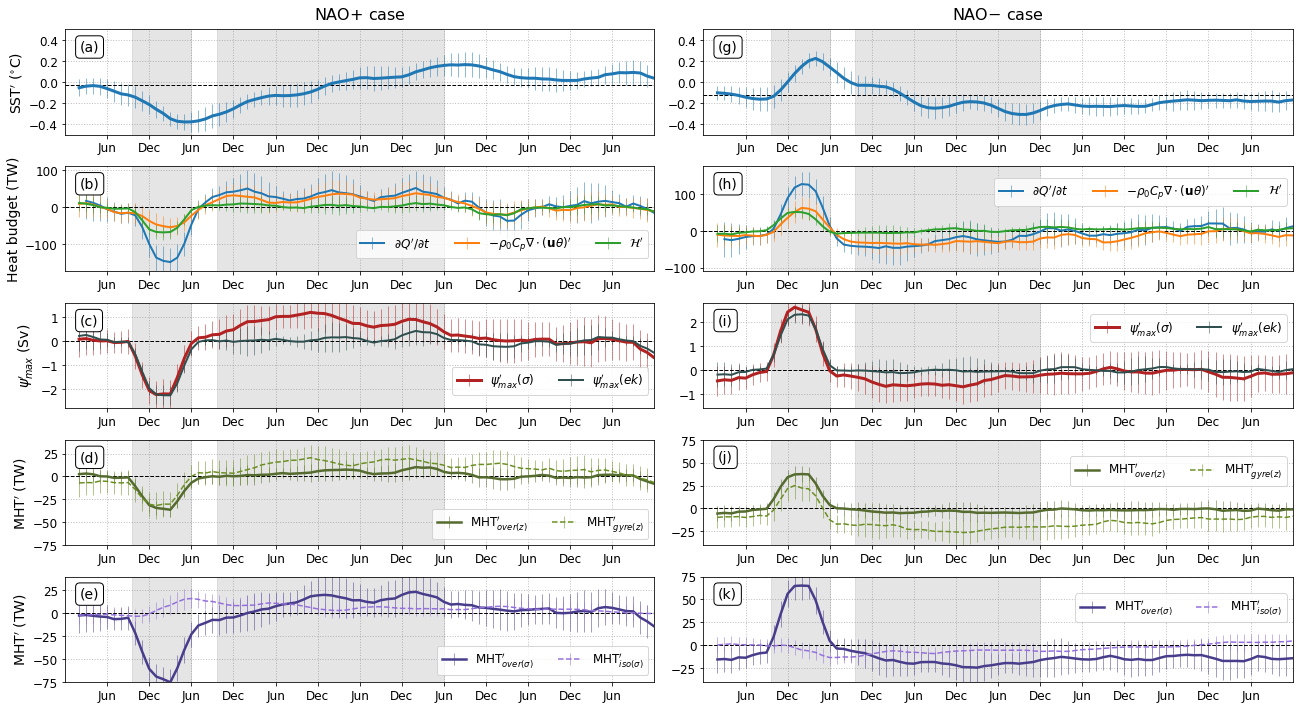

In [8]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

cfd_per = 1.98 # z-val for confidence interval 
                # (1.289 for 80%, 1.658 for 90%, 1.98 for 95%, 2.617 for 99% for deg. freddom = 120)
fs = 12 # font size

grid1 = plt.GridSpec(5, 6, wspace=0.3, hspace=0.3)
fig = plt.figure(figsize=[22,12])

props = dict(boxstyle='round', facecolor='white')

# ----------------------------------- #
# ------- SST timeseries ------------ #
# ----------------------------------- #
ax = fig.add_subplot(grid1[0, 0:3])
ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962, ds_NAOp['tos'], 
            yerr = 0.5*(ds_NAOp['tos_confidence_upper'] - ds_NAOp['tos_confidence_lower']), lw=3., elinewidth=.5)
ax.axhline(y=-0.025, ls='--', lw=1, color='k')
#ax.set_xlabel('Time (year)', fontsize=12)
ax.set_ylabel(r'SST$^{\prime}$ ($^{\circ}$C)', fontsize=fs+2) #, color=col[0])
ax.set_xlim([-1., 6.])
ax.set_ylim([-0.5, 0.5])
plt.xticks(np.arange(-0.5,6,0.5), ['Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun'], fontsize = fs);
plt.yticks(fontsize = 12) #, color=col[0]); 
plt.xticks(fontsize = 12);
ax.axvspan(-0.2, 0.5, alpha=0.2, color='gray')
ax.axvspan(0.8, 3.5, alpha=0.2, color='gray')
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
ax.set_title(r'NAO$+$ case', fontsize=fs+4, pad = 10)
ax.text(0.025, 0.9, '(a)', transform=ax.transAxes, fontsize=fs+2, 
        verticalalignment='top', bbox=props)

ax = fig.add_subplot(grid1[0, 3:6])
ax.errorbar(ds_NAOn['time.year'] + ds_NAOn['time.month']/12 - 1962, ds_NAOn['tos'], 
            yerr = 0.5*(ds_NAOn['tos_confidence_upper'] - ds_NAOn['tos_confidence_lower']), lw=3., elinewidth=.5)
ax.axhline(y=-0.125, ls='--', lw=1, color='k')
#ax.set_xlabel('Time (year)', fontsize=12)
#ax.set_ylabel(r'SST$^{\prime}$ ($^{\circ}$C)', fontsize=12) #, color=col[0])
ax.set_xlim([-1., 6.])
ax.set_ylim([-0.5, 0.5])
plt.xticks(np.arange(-0.5,6,0.5), ['Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun'], fontsize = fs);
plt.yticks(fontsize = 12) #, color=col[0]); 
plt.xticks(fontsize = 12);
ax.axvspan(-0.2, 0.5, alpha=0.2, color='gray')
ax.axvspan(0.8, 3.0, alpha=0.2, color='gray')
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
ax.set_title(r'NAO$-$ case', fontsize=fs+4, pad = 10)
ax.text(0.025, 0.9, '(g)', transform=ax.transAxes, fontsize=fs+2, 
        verticalalignment='top', bbox=props)

# ----------------------------------- #
# ------- Heat Budget timeseries ----- #
# ----------------------------------- #

ax = fig.add_subplot(grid1[1, 0:3])
ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962 + 1/12, ds_NAOp['Heat_Content_1300']/1e12, 
            yerr=(ds_NAOp['Heat_Content_1300_confidence_upper'] -  
                  ds_NAOp['Heat_Content_1300_confidence_lower'])/1e12, lw = 2., elinewidth=0.5, 
            label=r'${\partial Q^{\prime}/\partial t}$')
ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962, - ds_NAOp['Heat_Divergence']/1e12, 
            yerr=(ds_NAOp['Heat_Divergence_confidence_upper'] -  
                  ds_NAOp['Heat_Divergence_confidence_lower'])/1e12, lw = 2., elinewidth=0.5, 
            label=r'$-\rho_0C_p{\nabla\cdot({{\bf{u}}\theta})^{\prime}}$')
ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962, ds_NAOp['hfds']/1e12, 
            yerr=(ds_NAOp['hfds_confidence_upper'] -  
                  ds_NAOp['hfds_confidence_lower'])/1e12, lw = 2., elinewidth=0.5, 
            label=r'$\mathcal{H}^{\prime}$')
    
ax.axhline(y=0, ls='--', lw=1, color='k')
ax.set_ylabel(r'Heat budget (TW)', fontsize=fs+2)
#ax.set_title('Heat budget in the upper $1300$ m', pad=10, fontsize=12)
plt.legend(loc='upper right', bbox_to_anchor=(1., 0.45), fontsize=12, ncol=3)
plt.xticks(np.arange(-0.5,6,0.5), ['Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun'], fontsize = fs);
plt.yticks(fontsize = 12); plt.xticks(fontsize = 12);
ax.set_xlim([-1., 6.]);
ax.set_ylim([-175., 110.]);
ax.axvspan(-0.2, 0.5, alpha=0.2, color='gray')
ax.axvspan(0.8, 3.5, alpha=0.2, color='gray')
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
ax.text(0.025, 0.9, '(b)', transform=ax.transAxes, fontsize=fs+2, 
        verticalalignment='top', bbox=props)

ax = fig.add_subplot(grid1[1, 3:6])
ax.errorbar(ds_NAOn['time.year'] + ds_NAOn['time.month']/12 - 1962 + 1/12, ds_NAOn['Heat_Content_1300']/1e12, 
            yerr=(ds_NAOn['Heat_Content_1300_confidence_upper'] -  
                  ds_NAOn['Heat_Content_1300_confidence_lower'])/1e12, lw = 2., elinewidth=0.5, 
            label=r'${\partial Q^{\prime}/\partial t}$')
ax.errorbar(ds_NAOn['time.year'] + ds_NAOn['time.month']/12 - 1962, - ds_NAOn['Heat_Divergence']/1e12, 
            yerr=(ds_NAOn['Heat_Divergence_confidence_upper'] -  
                  ds_NAOn['Heat_Divergence_confidence_lower'])/1e12, lw = 2., elinewidth=0.5, 
            label=r'$-\rho_0C_p{\nabla\cdot({{\bf{u}}\theta})^{\prime}}$')
ax.errorbar(ds_NAOn['time.year'] + ds_NAOn['time.month']/12 - 1962, ds_NAOn['hfds']/1e12, 
            yerr=(ds_NAOn['hfds_confidence_upper'] -  
                  ds_NAOn['hfds_confidence_lower'])/1e12, lw = 2., elinewidth=0.5, 
            label=r'$\mathcal{H}^{\prime}$')
    
ax.axhline(y=0, ls='--', lw=1, color='k')
plt.legend(loc='upper right', bbox_to_anchor=(1., 0.95), fontsize=12, ncol=3)
plt.xticks(np.arange(-0.5,6,0.5), ['Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun'], fontsize = fs);
plt.yticks(fontsize = 12); plt.xticks(fontsize = 12);
ax.set_xlim([-1., 6.]);
ax.set_ylim([-110., 175.]);
ax.axvspan(-0.2, 0.5, alpha=0.2, color='gray')
ax.axvspan(0.8, 3.0, alpha=0.2, color='gray')
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
ax.text(0.025, 0.9, '(h)', transform=ax.transAxes, fontsize=fs+2, 
        verticalalignment='top', bbox=props)

# ----------------------------------- #
# ------- Overturning anomaly timeseries ----- #
# ----------------------------------- #

col = plt.cm.Set1(np.linspace(0.,0.55,3))

ax = fig.add_subplot(grid1[2, 0:3])
tmp = (ds_NAOp.interp(j_c=50, method='linear')).interp(lat=50., method='linear')
#ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962, tmp['Overturning_max_z']/1e6, 
#            yerr=(tmp['Overturning_max_z_confidence_upper'] -  
#                  tmp['Overturning_max_z_confidence_lower'])/1e6, lw = 2., elinewidth=0.5, color=col[1],
#            label=r'$\psi^{\prime}_{z}$')
ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962, tmp['Overturning_max_sigma']/1e6, 
            yerr=(tmp['Overturning_max_sigma_confidence_upper'] -  
                  tmp['Overturning_max_sigma_confidence_lower'])/1e6, lw = 3., elinewidth=0.5, color='firebrick',
            label=r'$\psi^{\prime}_{max}(\sigma)$')
ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962, tmp['Overturning_Ekman']/1e6, 
            yerr=(tmp['Overturning_Ekman_confidence_upper'] -  
                  tmp['Overturning_Ekman_confidence_lower'])/1e6, lw = 2., elinewidth=0.5, color='darkslategrey',
            label=r'$\psi^{\prime}_{max}(ek)$')
    
ax.axhline(y=0, ls='--', lw=1, color='k')
#ax.set_xlabel('Time (year)', fontsize=12)
ax.set_ylabel(r'$\psi^{\prime}_{max}$ (Sv)', fontsize=fs+2)
plt.legend(loc='upper right', bbox_to_anchor=(1., 0.45), fontsize=12, ncol=3)
plt.xticks(np.arange(-0.5,6,0.5), ['Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun'], fontsize = fs);
plt.yticks(fontsize = 12); plt.xticks(fontsize = 12);
ax.set_xlim([-1., 6.]);
ax.set_ylim([-2.8, 1.6]);
ax.axvspan(-0.2, 0.5, alpha=0.2, color='gray')
ax.axvspan(0.8, 3.5, alpha=0.2, color='gray')
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
ax.text(0.025, 0.9, '(c)', transform=ax.transAxes, fontsize=fs+2, verticalalignment='top', bbox=props);

ax = fig.add_subplot(grid1[2, 3:6])
tmp = (ds_NAOn.interp(j_c=50, method='linear')).interp(lat=50., method='linear')
ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962, tmp['Overturning_max_sigma']/1e6, 
            yerr=(tmp['Overturning_max_sigma_confidence_upper'] -  
                  tmp['Overturning_max_sigma_confidence_lower'])/1e6, lw = 3., elinewidth=0.5, color='firebrick',
            label=r'$\psi^{\prime}_{max}(\sigma)$')
ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962, tmp['Overturning_Ekman']/1e6, 
            yerr=(tmp['Overturning_Ekman_confidence_upper'] -  
                  tmp['Overturning_Ekman_confidence_lower'])/1e6, lw = 2., elinewidth=0.5, color='darkslategrey',
            label=r'$\psi^{\prime}_{max}(ek)$')
    
ax.axhline(y=0, ls='--', lw=1, color='k')
#ax.set_xlabel('Time (year)', fontsize=12)
plt.legend(loc='upper right', bbox_to_anchor=(1., 0.95), fontsize=12, ncol=3)
plt.xticks(np.arange(-0.5,6,0.5), ['Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun'], fontsize = fs);
plt.yticks(fontsize = 12); plt.xticks(fontsize = 12);
ax.set_xlim([-1., 6.]);
ax.set_ylim([-1.6, 2.8]);
ax.axvspan(-0.2, 0.5, alpha=0.2, color='gray')
ax.axvspan(0.8, 3.0, alpha=0.2, color='gray')
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
ax.text(0.025, 0.9, '(i)', transform=ax.transAxes, fontsize=fs+2, verticalalignment='top', bbox=props);

# ----------------------------------- #
# ------- Meridional Heat Transport anomaly timeseries ----- #
# ----------------------------------- #
ax = fig.add_subplot(grid1[3, 0:3])
tmp = (ds_NAOp.interp(j_c=50., method='linear')) / 1e12
ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962, tmp['MHT_overturning_z_int'], 
            yerr=(tmp['MHT_overturning_z_int_confidence_upper'] -  
                  tmp['MHT_overturning_z_int_confidence_lower']), lw = 2.5, elinewidth=0.5, color = 'darkolivegreen',
            label=r'MHT$_{over(z)}^{\prime}$')
ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962, tmp['MHT_gyre_z_int'], 
            yerr=(tmp['MHT_gyre_z_int_confidence_upper'] -  
                  tmp['MHT_gyre_z_int_confidence_lower']), lw = 1.5, elinewidth=0.5, ls = '--', color = 'olivedrab',
            label=r'MHT$_{gyre(z)}^{\prime}$')
ax.axhline(y=0, ls='--', lw=1, color='k')
#ax.set_xlabel('Time (year)', fontsize=12)
ax.set_ylabel(r'MHT$^{\prime}$ (TW)', fontsize=fs+2)
plt.legend(loc='upper right', bbox_to_anchor=(1., 0.4), fontsize=12, ncol=2)
plt.xticks(np.arange(-0.5,6,0.5), ['Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun'], fontsize = fs);
plt.yticks(fontsize = 12); plt.xticks(fontsize = 12);
ax.set_xlim([-1., 6.]);
ax.set_ylim([-75., 40.]);
ax.axvspan(-0.2, 0.5, alpha=0.2, color='gray')
ax.axvspan(0.8, 3.5, alpha=0.2, color='gray')
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
ax.text(0.025, 0.9, '(d)', transform=ax.transAxes, fontsize=fs+2, verticalalignment='top', bbox=props);

ax = fig.add_subplot(grid1[3, 3:6])
tmp = (ds_NAOn.interp(j_c=50., method='linear')) / 1e12
ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962, tmp['MHT_overturning_z_int'], 
            yerr=(tmp['MHT_overturning_z_int_confidence_upper'] -  
                  tmp['MHT_overturning_z_int_confidence_lower']), lw = 2.5, elinewidth=0.5, color = 'darkolivegreen',
            label=r'MHT$_{over(z)}^{\prime}$')
ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962, tmp['MHT_gyre_z_int'], 
            yerr=(tmp['MHT_gyre_z_int_confidence_upper'] -  
                  tmp['MHT_gyre_z_int_confidence_lower']), lw = 1.5, elinewidth=0.5, ls = '--', color = 'olivedrab',
            label=r'MHT$_{gyre(z)}^{\prime}$')
ax.axhline(y=0, ls='--', lw=1, color='k')
#ax.set_xlabel('Time (year)', fontsize=12)
plt.legend(loc='upper right', bbox_to_anchor=(1., 0.9), fontsize=12, ncol=2)
plt.xticks(np.arange(-0.5,6,0.5), ['Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun'], fontsize = fs);
plt.yticks(fontsize = 12); plt.xticks(fontsize = 12);
ax.set_xlim([-1., 6.]);
ax.set_ylim([-40., 75.]);
ax.axvspan(-0.2, 0.5, alpha=0.2, color='gray')
ax.axvspan(0.8, 3.0, alpha=0.2, color='gray')
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)

ax.text(0.025, 0.9, '(j)', transform=ax.transAxes, fontsize=fs+2, verticalalignment='top', bbox=props);


ax = fig.add_subplot(grid1[4, 0:3])
tmp = (ds_NAOp.interp(j_c=50., method='linear')) / 1e12
ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962, tmp['MHT_overturning_sigma_int'], 
            yerr=(tmp['MHT_overturning_sigma_int_confidence_upper'] -  
                  tmp['MHT_overturning_sigma_int_confidence_lower']), lw = 2.5, elinewidth=0.5, color = 'darkslateblue',
            label=r'MHT$_{over(\sigma)}^{\prime}$')
ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962, tmp['MHT_isopycnal_sigma_int'], 
            yerr=(tmp['MHT_isopycnal_sigma_int_confidence_upper'] -  
                  tmp['MHT_isopycnal_sigma_int_confidence_lower']), lw = 1.5, elinewidth=0.5, ls = '--', color = 'mediumpurple',
            label=r'MHT$_{iso(\sigma)}^{\prime}$')
    
ax.axhline(y=0, ls='--', lw=1, color='k')
#ax.set_xlabel('Time (year)', fontsize=12)
ax.set_ylabel(r'MHT$^{\prime}$ (TW)', fontsize=fs+2)
plt.legend(loc='upper right', bbox_to_anchor=(1., 0.4), fontsize=12, ncol=2)
plt.xticks(np.arange(-0.5,6,0.5), ['Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun'], fontsize = fs);
plt.yticks(fontsize = 12); plt.xticks(fontsize = 12);
ax.set_xlim([-1., 6.]);
ax.set_ylim([-75., 40.]);
ax.axvspan(-0.2, 0.5, alpha=0.2, color='gray')
ax.axvspan(0.8, 3.5, alpha=0.2, color='gray')
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
ax.text(0.025, 0.9, '(e)', transform=ax.transAxes, fontsize=fs+2, verticalalignment='top', bbox=props);

ax = fig.add_subplot(grid1[4, 3:6])
tmp = (ds_NAOn.interp(j_c=50., method='linear')) / 1e12
ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962, tmp['MHT_overturning_sigma_int'], 
            yerr=(tmp['MHT_overturning_sigma_int_confidence_upper'] -  
                  tmp['MHT_overturning_sigma_int_confidence_lower']), lw = 2.5, elinewidth=0.5, color = 'darkslateblue',
            label=r'MHT$_{over(\sigma)}^{\prime}$')
ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962, tmp['MHT_isopycnal_sigma_int'], 
            yerr=(tmp['MHT_isopycnal_sigma_int_confidence_upper'] -  
                  tmp['MHT_isopycnal_sigma_int_confidence_lower']), lw = 1.5, elinewidth=0.5, ls = '--', color = 'mediumpurple',
            label=r'MHT$_{iso(\sigma)}^{\prime}$')
    
ax.axhline(y=0, ls='--', lw=1, color='k')
#ax.set_xlabel('Time (year)', fontsize=12)
plt.legend(loc='upper right', bbox_to_anchor=(1., 0.9), fontsize=12, ncol=2)
plt.xticks(np.arange(-0.5,6,0.5), ['Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun'], fontsize = fs);
plt.yticks(fontsize = 12); plt.xticks(fontsize = 12);
ax.set_xlim([-1., 6.]);
ax.set_ylim([-40., 75.]);
ax.axvspan(-0.2, 0.5, alpha=0.2, color='gray')
ax.axvspan(0.8, 3.0, alpha=0.2, color='gray')
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)

ax.text(0.025, 0.9, '(k)', transform=ax.transAxes, fontsize=fs+2, verticalalignment='top', bbox=props);

fig.savefig('/home/users/hkhatri/Plots/Figures_GRL_2022/Figure4_new.png', dpi=300,bbox_inches='tight');
fig.savefig('/home/users/hkhatri/Plots/Figures_GRL_2022/Figure4_new.pdf', dpi=300,bbox_inches='tight');

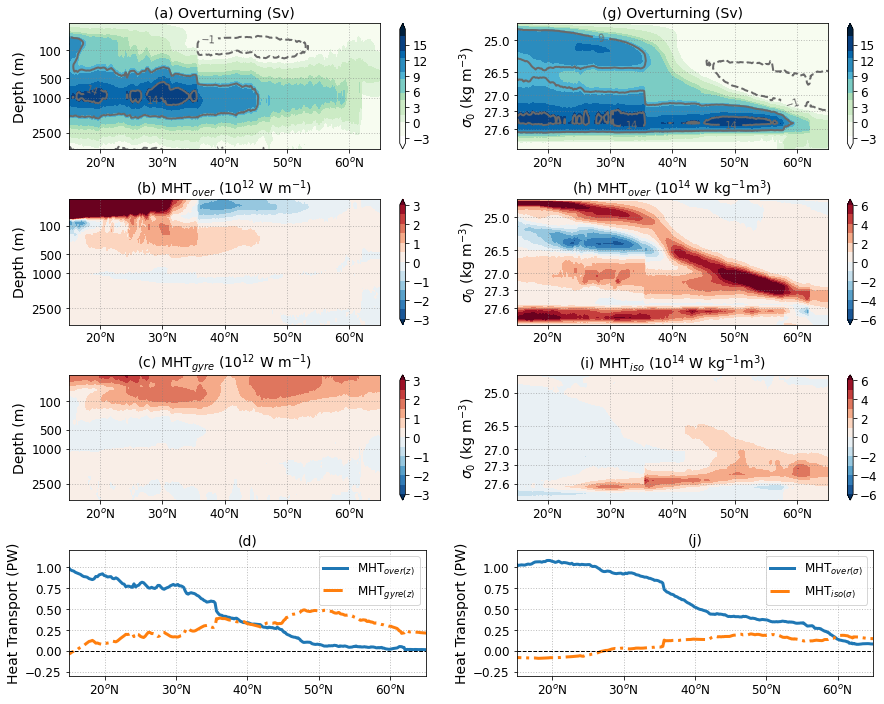

In [10]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

cfd_per = 1.98 # z-val for confidence interval 
                # (1.289 for 80%, 1.658 for 90%, 1.98 for 95%, 2.617 for 99% for deg. freddom = 120)
fs = 12 # font size

grid1 = plt.GridSpec(4, 2, wspace=0.15, hspace=0.4)
fig = plt.figure(figsize=[15,12])

props = dict(boxstyle='round', facecolor='white')

# ----------------------------------------------------------------- #
# --------- Overturning and heat tranposrt climatology ------------- #
# ----------------------------------------------------------------- #

dz = ds_drift['lev_outer'].diff(dim = 'lev_outer').rename({'lev_outer':'lev'}).drop('lev')
dz = dz.assign_coords(lev = ds_drift['lev'])

dsigma = ds_drift['sigma0_outer'].diff(dim = 'sigma0_outer').rename({'sigma0_outer':'sigma0'}).drop('sigma0')
dsigma = dsigma.assign_coords(sigma0 = ds_drift['sigma0'])

lat = ds_drift['latitude'].isel(r=0,time=0)

tmp = (ds_drift['Overturning_z'] - ds_drift['Overturning_z_barotropic']).mean(['r','time']).isel(j_c=slice(0,340)) / 1e6
tmp = tmp.assign_coords(j_c=lat.isel(j_c=slice(0,340)))

#tmp = tmp.drop('lev').assign_coords(lev = ds_drift['lev'].values + dz.values * 0.5)
tmp = tmp.drop('lev').assign_coords(lev = (ds_drift['lev_outer'].values[1:])**0.4) 

ax = fig.add_subplot(grid1[0, 0])
p = tmp.plot.contourf(ax=ax, x='j_c', y='lev', levels = 17, vmin = -4, vmax = 18,
                      cmap=cmaps.CBR_wet, add_labels=False, add_colorbar=False, extend='both')
    
ax.set_ylabel('Depth (m)', fontsize=fs+2)

plt.xticks(np.arange(20,61,10), [r'$20^o$N', r'$30^o$N', r'$40^o$N', r'$50^o$N', r'$60^o$N'], fontsize = fs);
plt.yticks((np.array([100., 500., 1000., 2500.]))**0.4, [r'100', r'500', r'1000', r'2500'])
ax.set_ylim([1., 3500.**0.4])
ax.set_xlim([15., 65.])
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)

CS = ax.contour(tmp['j_c'], tmp['lev'], tmp, [-1, 9, 14], linewidths=2., colors='dimgray')
manual_locations = [(1, 1), (-0.62, -0.7), (-2, 0.5)]
ax.clabel(CS, inline=True, fontsize=10) #, manual=manual_locations)

cb = fig.colorbar(p, ax=ax, ticks=[-3, 0, 3, 6, 9, 12, 15], extend='both') #, orientation="horizontal", pad=0.3)
cb.ax.tick_params(labelsize=fs) #, rotation = 90)
#cb.set_label('Overturning (Sv)', rotation=270, labelpad=20, size=fs-1) #, fontsize=fs, rotation=90)

ax.set_title('(a) Overturning (Sv)', fontsize=fs+2)
plt.gca().invert_yaxis()
plt.yticks(fontsize = fs);
plt.xticks(fontsize = fs);
#ax.text(0.025, 0.9, '(a)', transform=ax.transAxes, fontsize=fs+2, verticalalignment='top', bbox=props);

#bbox=plt.gca().get_position(); offset=.025;
#plt.gca().set_position([bbox.x0 , bbox.y0 + offset*0.5, bbox.x1-bbox.x0 - offset*0.0, bbox.y1 - bbox.y0])

tmp = ds_drift['MHT_overturning_z'].mean(['r','time']).isel(j_c=slice(0,340)) /dz
tmp = tmp.assign_coords(j_c=lat.isel(j_c=slice(0,340))) / 1e12

tmp = tmp.drop('lev').assign_coords(lev = (ds_drift['lev'].values)**0.4) 

ax = fig.add_subplot(grid1[1, 0])
p = tmp.plot.contourf(ax=ax, x='j_c', y='lev', levels = 13, vmin = -3, vmax = 3,
                      cmap=cmaps.MPL_RdBu_r, add_labels=False, add_colorbar=False, extend='both')
ax.set_ylabel('Depth (m)', fontsize=fs+2)
cb = fig.colorbar(p, ax=ax, extend='both') #, orientation="horizontal", pad=0.3)
cb.ax.tick_params(labelsize=fs)
ax.set_title('(b) MHT$_{over}$ ($10^{12}$ W m$^{-1}$)', fontsize=fs+2)
#cb.set_label('MHT$_{overturning}$ (W m$^{-1}$)', rotation=270, labelpad=20, size=fs - 1)
#cb.set_label('Heat Transport (W/m)', rotation=270, horizontalalignment='right')
plt.xticks(np.arange(20,61,10), [r'$20^o$N', r'$30^o$N', r'$40^o$N', r'$50^o$N', r'$60^o$N'], fontsize = fs);
plt.yticks((np.array([100., 500., 1000., 2500.]))**0.4, [r'100', r'500', r'1000', r'2500'])
ax.set_ylim([1., 3500.**0.4])
ax.set_xlim([15., 65.])
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
plt.gca().invert_yaxis()
plt.yticks(fontsize = fs);
plt.xticks(fontsize = fs);
#ax.text(0.025, 0.9, '(b)', transform=ax.transAxes, fontsize=fs+2, verticalalignment='top', bbox=props);

#bbox=plt.gca().get_position(); offset=.025;
#plt.gca().set_position([bbox.x0 , bbox.y0 + offset*0.5, bbox.x1-bbox.x0 - offset*0.0, bbox.y1 - bbox.y0])

tmp = ((ds_drift['MHT_z'] - ds_drift['MHT_z_baro'] - ds_drift['MHT_overturning_z_baro_v'] - 
        ds_drift['MHT_overturning_z_baro_theta'] -
        ds_drift['MHT_overturning_z'])).mean(['r','time']).isel(j_c=slice(0,340)) / dz
tmp = tmp.assign_coords(j_c=lat.isel(j_c=slice(0,340))) /1e12

tmp = tmp.drop('lev').assign_coords(lev = (ds_drift['lev'].values)**0.4) 

ax = fig.add_subplot(grid1[2, 0])
p = tmp.plot.contourf(ax=ax, x='j_c', y='lev', levels = 13, vmin = -3, vmax = 3,
                      cmap=cmaps.MPL_RdBu_r, add_labels=False, add_colorbar=False, extend='both')
ax.set_ylabel('Depth (m)', fontsize=fs+2)
cb = fig.colorbar(p, ax=ax, extend='both') #, orientation="horizontal", pad=0.3)
cb.ax.tick_params(labelsize=fs) #, rotation = 90)
ax.set_title('(c) MHT$_{gyre}$ ($10^{12}$ W m$^{-1}$)', fontsize=fs+2)
#cb.set_label('MHT$_{gyre}$ (W m$^{-1}$)', rotation=270, labelpad=20, size=fs - 1)
plt.xticks(np.arange(20,61,10), [r'$20^o$N', r'$30^o$N', r'$40^o$N', r'$50^o$N', r'$60^o$N'], fontsize = fs);
plt.yticks((np.array([100., 500., 1000., 2500.]))**0.4, [r'100', r'500', r'1000', r'2500'])
ax.set_ylim([1., 3500.**0.4])
ax.set_xlim([15., 65.])
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
plt.gca().invert_yaxis()
plt.yticks(fontsize = fs);
plt.xticks(fontsize = fs);
#ax.text(0.025, 0.9, '(c)', transform=ax.transAxes, fontsize=fs+2, verticalalignment='top', bbox=props);

ax = fig.add_subplot(grid1[3, 0])

lat = ds_drift['latitude'].isel(r=0,time=0)
tmp = ds_drift['MHT_overturning_z'].mean(['r', 'time']).sum('lev') /1e15
ax.plot(lat, tmp, lw=3., label=r'MHT$_{over(z)}$')
tmp = (ds_drift['MHT_z'] - ds_drift['MHT_z_baro'] - ds_drift['MHT_overturning_z_baro_v'] - ds_drift['MHT_overturning_z_baro_theta'] -
               ds_drift['MHT_overturning_z']).mean(['r', 'time']).sum('lev') /1e15
ax.plot(lat, tmp, lw=3., ls='-.', label=r'MHT$_{gyre(z)}$')
ax.axhline(y=0, ls='--', lw=1, color='k')
ax.set_ylabel('Heat Transport (PW)', fontsize=fs+2)
plt.xticks(np.arange(20,61,10), [r'$20^o$N', r'$30^o$N', r'$40^o$N', r'$50^o$N', r'$60^o$N'], fontsize = fs);
ax.set_xlim([15., 65.])
ax.set_ylim([-0.3, 1.2])
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
plt.yticks(fontsize = fs);
plt.xticks(fontsize = fs);
plt.legend(loc='upper right', bbox_to_anchor=(1., 1.), fontsize=12, ncol=1)
ax.set_title('(d)', fontsize=fs+2)

bbox=plt.gca().get_position(); offset=.03;
plt.gca().set_position([bbox.x0 , bbox.y0, bbox.x1-bbox.x0 - offset, bbox.y1 - bbox.y0])

tmp = (ds_drift['Overturning_sigma'] - ds_drift['Overturning_sigma_barotropic']).mean(['r','time']).isel(j_c=slice(0,340)) / 1e6
tmp = tmp.assign_coords(j_c=lat.isel(j_c=slice(0,340)))
rng_nl = ds_drift['sigma0_outer'].values[1:] * np.arange(0, len(ds_drift['sigma0']))**2
tmp = tmp.drop('sigma0').assign_coords(sigma0 = rng_nl)

ax = fig.add_subplot(grid1[0, 1])
p = tmp.plot.contourf(ax=ax, x='j_c', y='sigma0', levels = 17, vmin = -4, vmax = 18.,
                      cmap=cmaps.CBR_wet, add_labels=False, add_colorbar=False, extend='both')

ax.set_ylabel(r'$\sigma_0$ (kg m$^{-3}$)', fontsize=fs+2)
cb = fig.colorbar(p, ax=ax, extend='both', ticks=[-3, 0, 3, 6, 9, 12, 15]) #, orientation="horizontal", pad=0.3)
cb.ax.tick_params(labelsize=fs) #, rotation = 90)
ax.set_title('(g) Overturning (Sv)', fontsize=fs+2)
#cb.set_label('Overturning (Sv)', rotation=270, labelpad=20, size=fs-1)
plt.xticks(np.arange(20,61,10), [r'$20^o$N', r'$30^o$N', r'$40^o$N', r'$50^o$N', r'$60^o$N'], fontsize = fs);
ax.set_xlim([15., 65.])
ax.set_ylim([0., 4.24359e+04])
plt.yticks([rng_nl[15], rng_nl[25], rng_nl[30], rng_nl[33], rng_nl[36]], [25.0, 26.5, 27.0, 27.3, 27.6])
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)

CS = ax.contour(tmp['j_c'], tmp['sigma0'], tmp, [-1, 9, 14], linewidths=2., colors='dimgrey')
manual_locations = [(1, 1), (-0.62, -0.7), (-2, 0.5)]
ax.clabel(CS, inline=True, fontsize=10) #, manual=manual_locations)

plt.gca().invert_yaxis()
plt.yticks(fontsize = fs);
plt.xticks(fontsize = fs);
#ax.text(0.025, 0.9, '(g)', transform=ax.transAxes, fontsize=fs+2, verticalalignment='top', bbox=props);

tmp = ds_drift['MHT_overturning_sigma'].mean(['r','time']).isel(j_c=slice(0,340)) / dsigma
tmp = tmp.assign_coords(j_c=lat.isel(j_c=slice(0,340))) /1e14
rng_nl = ds_drift['sigma0'].values * np.arange(0, len(ds_drift['sigma0']))**2
tmp = tmp.drop('sigma0').assign_coords(sigma0 = rng_nl)

ax = fig.add_subplot(grid1[1, 1])
p = tmp.plot.contourf(ax=ax, x='j_c', y='sigma0', levels = 13, vmin = -6, vmax = 6,
                      cmap=cmaps.MPL_RdBu_r, add_labels=False, add_colorbar=False, extend='both')
cb = fig.colorbar(p, ax=ax, extend='both') #, orientation="horizontal", pad=0.3)
cb.ax.tick_params(labelsize=fs) #, rotation = 90)
ax.set_title(r'(h) MHT$_{over}$ ($10^{14}$ W kg$^{-1}$m$^{3}$)', fontsize=fs+2)
#cb.set_label('MHT$_{overturning}$ (W kg$^{-1}$m$^{3}$)', rotation=270, labelpad=20, size=fs-1)
ax.set_ylabel(r'$\sigma_0$ (kg m$^{-3}$)', fontsize=fs+2)
#ax.set_ylabel(r'$\sigma_0$ (kg/m$^3$)', fontsize=12)
plt.xticks(np.arange(20,61,10), [r'$20^o$N', r'$30^o$N', r'$40^o$N', r'$50^o$N', r'$60^o$N'], fontsize = fs);
ax.set_xlim([15., 65.])
ax.set_ylim([0., 4.235985e+04])
plt.yticks([15.5**2 * 25., 25.5**2*26.5, 30.5**2*27, 33.5**2*27.3, 36.5**2*27.6], [25.0, 26.5, 27.0, 27.3, 27.6])
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
plt.gca().invert_yaxis()
plt.yticks(fontsize = fs);
plt.xticks(fontsize = fs);
#ax.text(0.025, 0.9, '(h)', transform=ax.transAxes, fontsize=fs+2, verticalalignment='top', bbox=props);


tmp = (ds_drift['MHT_sigma'] - ds_drift['MHT_sigma_baro'] - ds_drift['MHT_overturning_sigma_baro_v'] 
       - ds_drift['MHT_overturning_sigma_baro_theta'] 
       - ds_drift['MHT_overturning_sigma']).mean(['r','time']).isel(j_c=slice(0,340)) / dsigma
tmp = tmp.assign_coords(j_c=lat.isel(j_c=slice(0,340))) / 1e14
rng_nl = ds_drift['sigma0'].values * np.arange(0, len(ds_drift['sigma0']))**2
tmp = tmp.drop('sigma0').assign_coords(sigma0 = rng_nl)

ax = fig.add_subplot(grid1[2, 1])
p = tmp.plot.contourf(ax=ax, x='j_c', y='sigma0', levels = 13, vmin = -6, vmax = 6,
                      cmap=cmaps.MPL_RdBu_r, add_labels=False, add_colorbar=False, extend='both')
cb = fig.colorbar(p, ax=ax, extend='both') #, orientation="horizontal", pad=0.3)
cb.ax.tick_params(labelsize=fs) #, rotation = 90)
ax.set_ylabel(r'$\sigma_0$ (kg m$^{-3}$)', fontsize=fs+2)
ax.set_title(r'(i) MHT$_{iso}$ ($10^{14}$ W kg$^{-1}$m$^{3}$)', fontsize=fs+2)
#cb.set_label('MHT$_{isopycnal}$ (W kg$^{-1}$m$^{3}$)', rotation=270, labelpad=20, size=fs-1)
plt.xticks(np.arange(20,61,10), [r'$20^o$N', r'$30^o$N', r'$40^o$N', r'$50^o$N', r'$60^o$N'], fontsize = fs);
ax.set_xlim([15., 65.])
ax.set_ylim([0., 4.235985e+04])
plt.yticks([15.5**2 * 25., 25.5**2*26.5, 30.5**2*27, 33.5**2*27.3, 36.5**2*27.6], [25.0, 26.5, 27.0, 27.3, 27.6])
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
plt.gca().invert_yaxis()
plt.yticks(fontsize = fs);
plt.xticks(fontsize = fs);
#ax.text(0.025, 0.9, '(i)', transform=ax.transAxes, fontsize=fs+2, verticalalignment='top', bbox=props);

ax = fig.add_subplot(grid1[3, 1])

lat = ds_drift['latitude'].isel(r=0,time=0)
tmp = ds_drift['MHT_overturning_sigma'].mean(['r', 'time']).sum('sigma0') / 1e15
ax.plot(lat, tmp, lw=3., label=r'MHT$_{over(\sigma)}$')
tmp = (ds_drift['MHT_sigma'] - ds_drift['MHT_sigma_baro'] - ds_drift['MHT_overturning_sigma_baro_v'] - ds_drift['MHT_overturning_sigma_baro_theta'] -
               ds_drift['MHT_overturning_sigma']).mean(['r', 'time']).sum('sigma0') / 1e15
ax.plot(lat, tmp, lw=3., ls='-.', label=r'MHT$_{iso(\sigma)}$')
ax.axhline(y=0, ls='--', lw=1, color='k')
ax.set_ylabel('Heat Transport (PW)', fontsize=fs+2)
plt.xticks(np.arange(20,61,10), [r'$20^o$N', r'$30^o$N', r'$40^o$N', r'$50^o$N', r'$60^o$N'], fontsize = fs);
ax.set_xlim([15., 65.])
ax.set_ylim([-0.3, 1.2])
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
plt.yticks(fontsize = fs);
plt.xticks(fontsize = fs);
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0), fontsize=12, ncol=1)
ax.set_title('(j)', fontsize=fs+2)
#ax.yaxis.major.formatter._useMathText = True

bbox=plt.gca().get_position(); offset=.03;
plt.gca().set_position([bbox.x0 , bbox.y0, bbox.x1-bbox.x0 - offset, bbox.y1 - bbox.y0])

fig.savefig('/home/users/hkhatri/Plots/Figures_GRL_2022/Figure3_new.png', dpi=300,bbox_inches='tight');
fig.savefig('/home/users/hkhatri/Plots/Figures_GRL_2022/Figure3_new.pdf', dpi=300,bbox_inches='tight');

## Plots for supporting information

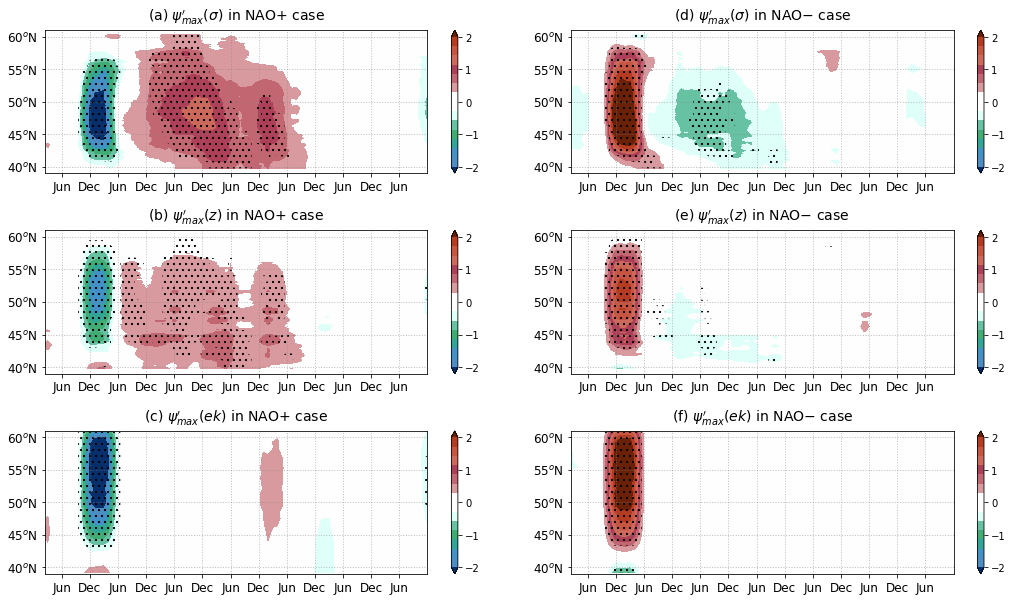

In [72]:
cfd_per = 1.98 # z-val for confidence interval 
            # (1.289 for 80%, 1.658 for 90%, 1.98 for 95%, 2.617 for 99% for deg. freddom = 120)
hatch_dense = 2

grid1 = plt.GridSpec(3, 2, wspace=0.1, hspace=0.4)
fig = plt.figure(figsize=[18,10])

tmp = ds_NAOp['Overturning_max_sigma'].transpose()/1e6
tmp = tmp.drop('time').assign_coords(time=ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962)
tmp_cfd = ds_NAOp['Overturning_max_sigma_standard_error'].transpose() * cfd_per * 2. / 1e6
tmp_cfd = tmp_cfd.drop('time').assign_coords(time=ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962)

ax = fig.add_subplot(grid1[0, 0])
p = tmp.plot.contourf(ax=ax, y='j_c', x='time', levels = 15, vmin = -2., vmax = 2.,
                      cmap=cmaps.precip4_diff_19lev_r, add_labels=False, add_colorbar=False, extend='both')
ax.contourf(tmp['time'], tmp['j_c'], (np.abs(tmp) > np.abs(tmp_cfd)), colors='none', 
                levels=[.5,1.,1.5, 2.], hatches=[hatch_dense*'.'])

plt.yticks(np.arange(40,61,5), [r'$40^o$N', r'$45^o$N', r'$50^o$N', r'$55^o$N', r'$60^o$N'], fontsize = fs);
plt.xticks(np.arange(-0.5,6,0.5), 
           ['Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun'], fontsize = fs);

cb = fig.colorbar(p, ax=ax, ticks=[-2, -1, 0, 1, 2], extend='both') 

plt.yticks(fontsize = 12) #, color=col[0]); 
plt.xticks(fontsize = 12);
ax.set_xlim([-0.8, 6.]);
ax.set_ylim([39., 61.]);
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
ax.set_title(r'(a) $\psi^{\prime}_{max}(\sigma)$ in NAO$+$ case', fontsize=fs+2, pad = 10)

tmp = ds_NAOp['Overturning_max_z'].transpose()/1e6
tmp = tmp.drop('time').assign_coords(time=ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962) 
tmp_cfd = ds_NAOp['Overturning_max_z_standard_error'].transpose() * cfd_per * 2. / 1e6
tmp_cfd = tmp_cfd.drop('time').assign_coords(time=ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962)

ax = fig.add_subplot(grid1[1, 0])
p = tmp.plot.contourf(ax=ax, y='j_c', x='time', levels = 15, vmin = -2., vmax = 2.,
                      cmap=cmaps.precip4_diff_19lev_r, add_labels=False, add_colorbar=False, extend='both')
ax.contourf(tmp['time'], tmp['j_c'], (np.abs(tmp) > np.abs(tmp_cfd)), colors='none', 
                levels=[.5,1.,1.5, 2.], hatches=[hatch_dense*'.'])

plt.yticks(np.arange(40,61,5), [r'$40^o$N', r'$45^o$N', r'$50^o$N', r'$55^o$N', r'$60^o$N'], fontsize = fs);
plt.xticks(np.arange(-0.5,6,0.5), 
           ['Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun'], fontsize = fs);

cb = fig.colorbar(p, ax=ax, ticks=[-2, -1, 0, 1, 2], extend='both') 

plt.yticks(fontsize = 12) #, color=col[0]); 
plt.xticks(fontsize = 12);
ax.set_xlim([-0.8, 6.]);
ax.set_ylim([39., 61.]);
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
ax.set_title(r'(b) $\psi^{\prime}_{max}(z)$ in NAO$+$ case', fontsize=fs+2, pad = 10)

tmp = ds_NAOp['Overturning_Ekman'].transpose()/1e6
tmp = tmp.drop('time').assign_coords(time=ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962)
tmp_cfd = ds_NAOp['Overturning_Ekman_standard_error'].transpose() * cfd_per * 2. / 1e6
tmp_cfd = tmp_cfd.drop('time').assign_coords(time=ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962)

ax = fig.add_subplot(grid1[2, 0])
p = tmp.plot.contourf(ax=ax, y='lat', x='time', levels = 15, vmin = -2., vmax = 2.,
                      cmap=cmaps.precip4_diff_19lev_r, add_labels=False, add_colorbar=False, extend='both')
ax.contourf(tmp['time'], tmp['lat'], (np.abs(tmp) > np.abs(tmp_cfd)), colors='none', 
                levels=[.5,1.,1.5, 2.], hatches=[hatch_dense*'.'])

plt.yticks(np.arange(40,61,5), [r'$40^o$N', r'$45^o$N', r'$50^o$N', r'$55^o$N', r'$60^o$N'], fontsize = fs);
plt.xticks(np.arange(-0.5,6,0.5), 
           ['Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun'], fontsize = fs);

cb = fig.colorbar(p, ax=ax, ticks=[-2, -1, 0, 1, 2], extend='both') 

plt.yticks(fontsize = 12) #, color=col[0]); 
plt.xticks(fontsize = 12);
ax.set_xlim([-0.8, 6.]);
ax.set_ylim([39., 61.]);
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
ax.set_title(r'(c) $\psi^{\prime}_{max}(ek)$ in NAO$+$ case', fontsize=fs+2, pad = 10)

# ------ NAO- case --------- #
tmp = ds_NAOn['Overturning_max_sigma'].transpose()/1e6
tmp = tmp.drop('time').assign_coords(time=ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962)
tmp_cfd = ds_NAOn['Overturning_max_sigma_standard_error'].transpose() * cfd_per * 2. / 1e6
tmp_cfd = tmp_cfd.drop('time').assign_coords(time=ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962)

ax = fig.add_subplot(grid1[0, 1])
p = tmp.plot.contourf(ax=ax, y='j_c', x='time', levels = 15, vmin = -2., vmax = 2.,
                      cmap=cmaps.precip4_diff_19lev_r, add_labels=False, add_colorbar=False, extend='both')
ax.contourf(tmp['time'], tmp['j_c'], (np.abs(tmp) > np.abs(tmp_cfd)), colors='none', 
                levels=[.5,1.,1.5, 2.], hatches=[hatch_dense*'.'])

plt.yticks(np.arange(40,61,5), [r'$40^o$N', r'$45^o$N', r'$50^o$N', r'$55^o$N', r'$60^o$N'], fontsize = fs);
plt.xticks(np.arange(-0.5,6,0.5), 
           ['Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun'], fontsize = fs);

cb = fig.colorbar(p, ax=ax, ticks=[-2, -1, 0, 1, 2], extend='both') 

plt.yticks(fontsize = 12) #, color=col[0]); 
plt.xticks(fontsize = 12);
ax.set_xlim([-0.8, 6.]);
ax.set_ylim([39., 61.]);
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
ax.set_title(r'(d) $\psi^{\prime}_{max}(\sigma)$ in NAO$-$ case', fontsize=fs+2, pad = 10)

tmp = ds_NAOn['Overturning_max_z'].transpose()/1e6
tmp = tmp.drop('time').assign_coords(time=ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962)
tmp_cfd = ds_NAOn['Overturning_max_z_standard_error'].transpose() * cfd_per * 2. / 1e6
tmp_cfd = tmp_cfd.drop('time').assign_coords(time=ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962)

ax = fig.add_subplot(grid1[1, 1])
p = tmp.plot.contourf(ax=ax, y='j_c', x='time', levels = 15, vmin = -2., vmax = 2.,
                      cmap=cmaps.precip4_diff_19lev_r, add_labels=False, add_colorbar=False, extend='both')
ax.contourf(tmp['time'], tmp['j_c'], (np.abs(tmp) > np.abs(tmp_cfd)), colors='none', 
                levels=[.5,1.,1.5, 2.], hatches=[hatch_dense*'.'])

plt.yticks(np.arange(40,61,5), [r'$40^o$N', r'$45^o$N', r'$50^o$N', r'$55^o$N', r'$60^o$N'], fontsize = fs);
plt.xticks(np.arange(-0.5,6,0.5), 
           ['Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun'], fontsize = fs);

cb = fig.colorbar(p, ax=ax, ticks=[-2, -1, 0, 1, 2], extend='both') 

plt.yticks(fontsize = 12) #, color=col[0]); 
plt.xticks(fontsize = 12);
ax.set_xlim([-0.8, 6.]);
ax.set_ylim([39., 61.]);
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
ax.set_title(r'(e) $\psi^{\prime}_{max}(z)$ in NAO$-$ case', fontsize=fs+2, pad = 10)

tmp = ds_NAOn['Overturning_Ekman'].transpose()/1e6
tmp = tmp.drop('time').assign_coords(time=ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962)
tmp_cfd = ds_NAOn['Overturning_Ekman_standard_error'].transpose() * cfd_per * 2. / 1e6
tmp_cfd = tmp_cfd.drop('time').assign_coords(time=ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962)

ax = fig.add_subplot(grid1[2, 1])
p = tmp.plot.contourf(ax=ax, y='lat', x='time', levels = 15, vmin = -2., vmax = 2.,
                      cmap=cmaps.precip4_diff_19lev_r, add_labels=False, add_colorbar=False, extend='both')
ax.contourf(tmp['time'], tmp['lat'], (np.abs(tmp) > np.abs(tmp_cfd)), colors='none', 
                levels=[.5,1.,1.5, 2.], hatches=[hatch_dense*'.'])

plt.yticks(np.arange(40,61,5), [r'$40^o$N', r'$45^o$N', r'$50^o$N', r'$55^o$N', r'$60^o$N'], fontsize = fs);
plt.xticks(np.arange(-0.5,6,0.5), 
           ['Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun'], fontsize = fs);

cb = fig.colorbar(p, ax=ax, ticks=[-2, -1, 0, 1, 2], extend='both') 

plt.yticks(fontsize = 12) #, color=col[0]); 
plt.xticks(fontsize = 12);
ax.set_xlim([-0.8, 6.]);
ax.set_ylim([39., 61.]);
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
ax.set_title(r'(f) $\psi^{\prime}_{max}(ek)$ in NAO$-$ case', fontsize=fs+2, pad = 10)

fig.savefig('/home/users/hkhatri/Plots/Figures_GRL_2022/Figure3_support.png', dpi=300,bbox_inches='tight');
fig.savefig('/home/users/hkhatri/Plots/Figures_GRL_2022/Figure3_support.pdf', dpi=300,bbox_inches='tight');

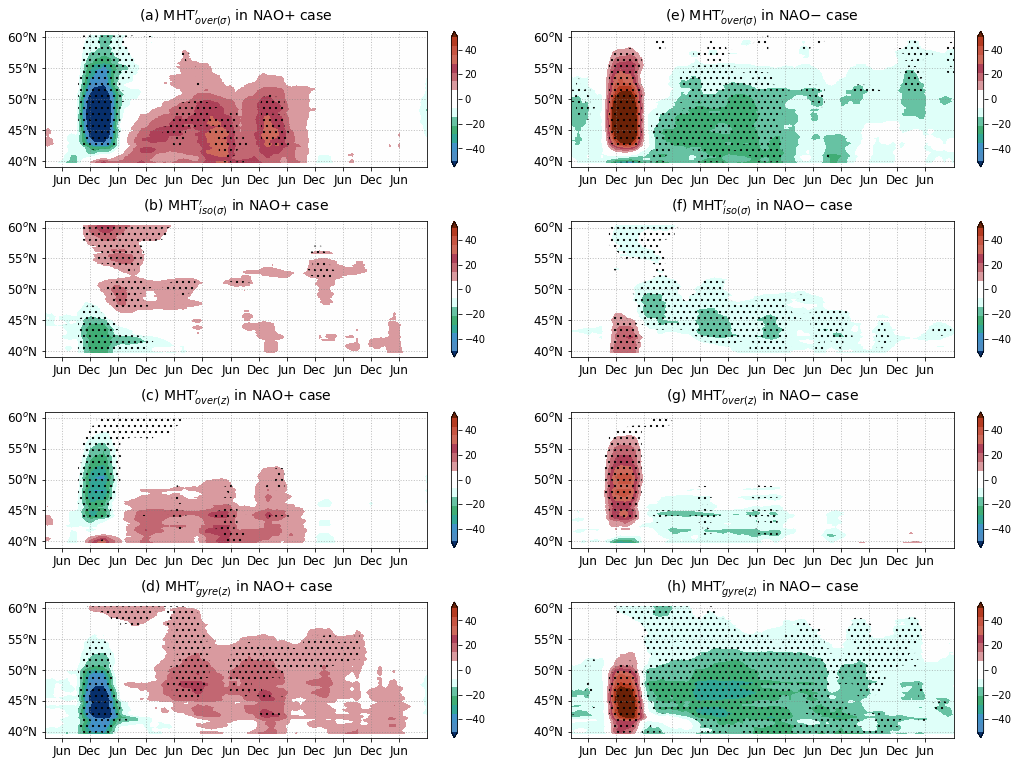

In [11]:
cfd_per = 1.98 # z-val for confidence interval 
            # (1.289 for 80%, 1.658 for 90%, 1.98 for 95%, 2.617 for 99% for deg. freddom = 120)
hatch_dense = 2

grid1 = plt.GridSpec(4, 2, wspace=0.1, hspace=0.4)
fig = plt.figure(figsize=[18,13])

tmp = ds_NAOp['MHT_overturning_sigma_int'].transpose()/1e12
tmp = tmp.drop('time').assign_coords(time=ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962)
tmp_cfd = ds_NAOp['MHT_overturning_sigma_int_standard_error'].transpose() * cfd_per * 2. / 1e12
tmp_cfd = tmp_cfd.drop('time').assign_coords(time=ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962)

ax = fig.add_subplot(grid1[0, 0])
p = tmp.plot.contourf(ax=ax, y='j_c', x='time', levels = 15, vmin = -50., vmax = 50.,
                      cmap=cmaps.precip4_diff_19lev_r, add_labels=False, add_colorbar=False, extend='both')
ax.contourf(tmp['time'], tmp['j_c'], (np.abs(tmp) > np.abs(tmp_cfd)), colors='none', 
                levels=[.5,1.,1.5, 2.], hatches=[hatch_dense*'.'])

plt.yticks(np.arange(40,61,5), [r'$40^o$N', r'$45^o$N', r'$50^o$N', r'$55^o$N', r'$60^o$N'], fontsize = fs);
plt.xticks(np.arange(-0.5,6,0.5), 
           ['Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun'], fontsize = fs);

cb = fig.colorbar(p, ax=ax, ticks=[-40, -20, 0, 20, 40], extend='both') 

plt.yticks(fontsize = 12) #, color=col[0]); 
plt.xticks(fontsize = 12);
ax.set_xlim([-0.8, 6.]);
ax.set_ylim([39., 61.]);
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
ax.set_title(r'(a) MHT$_{over(\sigma)}^{\prime}$ in NAO$+$ case', fontsize=fs+2, pad = 10)


tmp = ds_NAOp['MHT_isopycnal_sigma_int'].transpose()/1e12
tmp = tmp.drop('time').assign_coords(time=ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962)
tmp_cfd = ds_NAOp['MHT_isopycnal_sigma_int_standard_error'].transpose() * cfd_per * 2. / 1e12
tmp_cfd = tmp_cfd.drop('time').assign_coords(time=ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962)

ax = fig.add_subplot(grid1[1, 0])
p = tmp.plot.contourf(ax=ax, y='j_c', x='time', levels = 15, vmin = -50., vmax = 50.,
                      cmap=cmaps.precip4_diff_19lev_r, add_labels=False, add_colorbar=False, extend='both')
ax.contourf(tmp['time'], tmp['j_c'], (np.abs(tmp) > np.abs(tmp_cfd)), colors='none', 
                levels=[.5,1.,1.5, 2.], hatches=[hatch_dense*'.'])

plt.yticks(np.arange(40,61,5), [r'$40^o$N', r'$45^o$N', r'$50^o$N', r'$55^o$N', r'$60^o$N'], fontsize = fs);
plt.xticks(np.arange(-0.5,6,0.5), 
           ['Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun'], fontsize = fs);

cb = fig.colorbar(p, ax=ax, ticks=[-40, -20, 0, 20, 40], extend='both') 

plt.yticks(fontsize = 12) #, color=col[0]); 
plt.xticks(fontsize = 12);
ax.set_xlim([-0.8, 6.]);
ax.set_ylim([39., 61.]);
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
ax.set_title(r'(b) MHT$_{iso(\sigma)}^{\prime}$ in NAO$+$ case', fontsize=fs+2, pad = 10)

tmp = ds_NAOp['MHT_overturning_z_int'].transpose()/1e12
tmp = tmp.drop('time').assign_coords(time=ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962)
tmp_cfd = ds_NAOp['MHT_overturning_z_int_standard_error'].transpose() * cfd_per * 2. / 1e12
tmp_cfd = tmp_cfd.drop('time').assign_coords(time=ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962)

ax = fig.add_subplot(grid1[2, 0])
p = tmp.plot.contourf(ax=ax, y='j_c', x='time', levels = 15, vmin = -50., vmax = 50.,
                      cmap=cmaps.precip4_diff_19lev_r, add_labels=False, add_colorbar=False, extend='both')
ax.contourf(tmp['time'], tmp['j_c'], (np.abs(tmp) > np.abs(tmp_cfd)), colors='none', 
                levels=[.5,1.,1.5, 2.], hatches=[hatch_dense*'.'])

plt.yticks(np.arange(40,61,5), [r'$40^o$N', r'$45^o$N', r'$50^o$N', r'$55^o$N', r'$60^o$N'], fontsize = fs);
plt.xticks(np.arange(-0.5,6,0.5), 
           ['Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun'], fontsize = fs);

cb = fig.colorbar(p, ax=ax, ticks=[-40, -20, 0, 20, 40], extend='both') 

plt.yticks(fontsize = 12) #, color=col[0]); 
plt.xticks(fontsize = 12);
ax.set_xlim([-0.8, 6.]);
ax.set_ylim([39., 61.]);
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
ax.set_title(r'(c) MHT$_{over(z)}^{\prime}$ in NAO$+$ case', fontsize=fs+2, pad = 10)


tmp = ds_NAOp['MHT_gyre_z_int'].transpose()/1e12
tmp = tmp.drop('time').assign_coords(time=ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962)
tmp_cfd = ds_NAOp['MHT_gyre_z_int_standard_error'].transpose() * cfd_per * 2. / 1e12
tmp_cfd = tmp_cfd.drop('time').assign_coords(time=ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962)

ax = fig.add_subplot(grid1[3, 0])
p = tmp.plot.contourf(ax=ax, y='j_c', x='time', levels = 15, vmin = -50., vmax = 50.,
                      cmap=cmaps.precip4_diff_19lev_r, add_labels=False, add_colorbar=False, extend='both')
ax.contourf(tmp['time'], tmp['j_c'], (np.abs(tmp) > np.abs(tmp_cfd)), colors='none', 
                levels=[.5,1.,1.5, 2.], hatches=[hatch_dense*'.'])

plt.yticks(np.arange(40,61,5), [r'$40^o$N', r'$45^o$N', r'$50^o$N', r'$55^o$N', r'$60^o$N'], fontsize = fs);
plt.xticks(np.arange(-0.5,6,0.5), 
           ['Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun'], fontsize = fs);

cb = fig.colorbar(p, ax=ax, ticks=[-40, -20, 0, 20, 40], extend='both') 

plt.yticks(fontsize = 12) #, color=col[0]); 
plt.xticks(fontsize = 12);
ax.set_xlim([-0.8, 6.]);
ax.set_ylim([39., 61.]);
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
ax.set_title(r'(d) MHT$_{gyre(z)}^{\prime}$ in NAO$+$ case', fontsize=fs+2, pad = 10)

# ------ NAO- case --------- #

tmp = ds_NAOn['MHT_overturning_sigma_int'].transpose()/1e12
tmp = tmp.drop('time').assign_coords(time=ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962) 
tmp_cfd = ds_NAOn['MHT_overturning_sigma_int_standard_error'].transpose() * cfd_per * 2. / 1e12
tmp_cfd = tmp_cfd.drop('time').assign_coords(time=ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962)

ax = fig.add_subplot(grid1[0, 1])
p = tmp.plot.contourf(ax=ax, y='j_c', x='time', levels = 15, vmin = -50., vmax = 50.,
                      cmap=cmaps.precip4_diff_19lev_r, add_labels=False, add_colorbar=False, extend='both')
ax.contourf(tmp['time'], tmp['j_c'], (np.abs(tmp) > np.abs(tmp_cfd)), colors='none', 
                levels=[.5,1.,1.5, 2.], hatches=[hatch_dense*'.'])

plt.yticks(np.arange(40,61,5), [r'$40^o$N', r'$45^o$N', r'$50^o$N', r'$55^o$N', r'$60^o$N'], fontsize = fs);
plt.xticks(np.arange(-0.5,6,0.5), 
           ['Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun'], fontsize = fs);

cb = fig.colorbar(p, ax=ax, ticks=[-40, -20, 0, 20, 40], extend='both') 

plt.yticks(fontsize = 12) #, color=col[0]); 
plt.xticks(fontsize = 12);
ax.set_xlim([-0.8, 6.]);
ax.set_ylim([39., 61.]);
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
ax.set_title(r'(e) MHT$_{over(\sigma)}^{\prime}$ in NAO$-$ case', fontsize=fs+2, pad = 10)


tmp = ds_NAOn['MHT_isopycnal_sigma_int'].transpose()/1e12
tmp = tmp.drop('time').assign_coords(time=ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962) 
tmp_cfd = ds_NAOn['MHT_isopycnal_sigma_int_standard_error'].transpose() * cfd_per * 2. / 1e12
tmp_cfd = tmp_cfd.drop('time').assign_coords(time=ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962)

ax = fig.add_subplot(grid1[1, 1])
p = tmp.plot.contourf(ax=ax, y='j_c', x='time', levels = 15, vmin = -50., vmax = 50.,
                      cmap=cmaps.precip4_diff_19lev_r, add_labels=False, add_colorbar=False, extend='both')
ax.contourf(tmp['time'], tmp['j_c'], (np.abs(tmp) > np.abs(tmp_cfd)), colors='none', 
                levels=[.5,1.,1.5, 2.], hatches=[hatch_dense*'.'])

plt.yticks(np.arange(40,61,5), [r'$40^o$N', r'$45^o$N', r'$50^o$N', r'$55^o$N', r'$60^o$N'], fontsize = fs);
plt.xticks(np.arange(-0.5,6,0.5), 
           ['Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun'], fontsize = fs);

cb = fig.colorbar(p, ax=ax, ticks=[-40, -20, 0, 20, 40], extend='both') 

plt.yticks(fontsize = 12) #, color=col[0]); 
plt.xticks(fontsize = 12);
ax.set_xlim([-0.8, 6.]);
ax.set_ylim([39., 61.]);
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
ax.set_title(r'(f) MHT$_{iso(\sigma)}^{\prime}$ in NAO$-$ case', fontsize=fs+2, pad = 10)

tmp = ds_NAOn['MHT_overturning_z_int'].transpose()/1e12
tmp = tmp.drop('time').assign_coords(time=ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962) 
tmp_cfd = ds_NAOn['MHT_overturning_z_int_standard_error'].transpose() * cfd_per * 2. / 1e12
tmp_cfd = tmp_cfd.drop('time').assign_coords(time=ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962)

ax = fig.add_subplot(grid1[2, 1])
p = tmp.plot.contourf(ax=ax, y='j_c', x='time', levels = 15, vmin = -50., vmax = 50.,
                      cmap=cmaps.precip4_diff_19lev_r, add_labels=False, add_colorbar=False, extend='both')
ax.contourf(tmp['time'], tmp['j_c'], (np.abs(tmp) > np.abs(tmp_cfd)), colors='none', 
                levels=[.5,1.,1.5, 2.], hatches=[hatch_dense*'.'])

plt.yticks(np.arange(40,61,5), [r'$40^o$N', r'$45^o$N', r'$50^o$N', r'$55^o$N', r'$60^o$N'], fontsize = fs);
plt.xticks(np.arange(-0.5,6,0.5), 
           ['Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun'], fontsize = fs);

cb = fig.colorbar(p, ax=ax, ticks=[-40, -20, 0, 20, 40], extend='both') 

plt.yticks(fontsize = 12) #, color=col[0]); 
plt.xticks(fontsize = 12);
ax.set_xlim([-0.8, 6.]);
ax.set_ylim([39., 61.]);
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
ax.set_title(r'(g) MHT$_{over(z)}^{\prime}$ in NAO$-$ case', fontsize=fs+2, pad = 10)


tmp = ds_NAOn['MHT_gyre_z_int'].transpose()/1e12
tmp = tmp.drop('time').assign_coords(time=ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962) 
tmp_cfd = ds_NAOn['MHT_gyre_z_int_standard_error'].transpose() * cfd_per * 2. / 1e12
tmp_cfd = tmp_cfd.drop('time').assign_coords(time=ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962)

ax = fig.add_subplot(grid1[3, 1])
p = tmp.plot.contourf(ax=ax, y='j_c', x='time', levels = 15, vmin = -50., vmax = 50.,
                      cmap=cmaps.precip4_diff_19lev_r, add_labels=False, add_colorbar=False, extend='both')

plt.yticks(np.arange(40,61,5), [r'$40^o$N', r'$45^o$N', r'$50^o$N', r'$55^o$N', r'$60^o$N'], fontsize = fs);
ax.contourf(tmp['time'], tmp['j_c'], (np.abs(tmp) > np.abs(tmp_cfd)), colors='none', 
                levels=[.5,1.,1.5, 2.], hatches=[hatch_dense*'.'])
plt.xticks(np.arange(-0.5,6,0.5), 
           ['Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun'], fontsize = fs);

cb = fig.colorbar(p, ax=ax, ticks=[-40, -20, 0, 20, 40], extend='both') 

plt.yticks(fontsize = 12) #, color=col[0]); 
plt.xticks(fontsize = 12);
ax.set_xlim([-0.8, 6.]);
ax.set_ylim([39., 61.]);
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
ax.set_title(r'(h) MHT$_{gyre(z)}^{\prime}$ in NAO$-$ case', fontsize=fs+2, pad = 10)

fig.savefig('/home/users/hkhatri/Plots/Figures_GRL_2022/Figure4_support.png', dpi=300,bbox_inches='tight');
fig.savefig('/home/users/hkhatri/Plots/Figures_GRL_2022/Figure4_support.pdf', dpi=300,bbox_inches='tight');

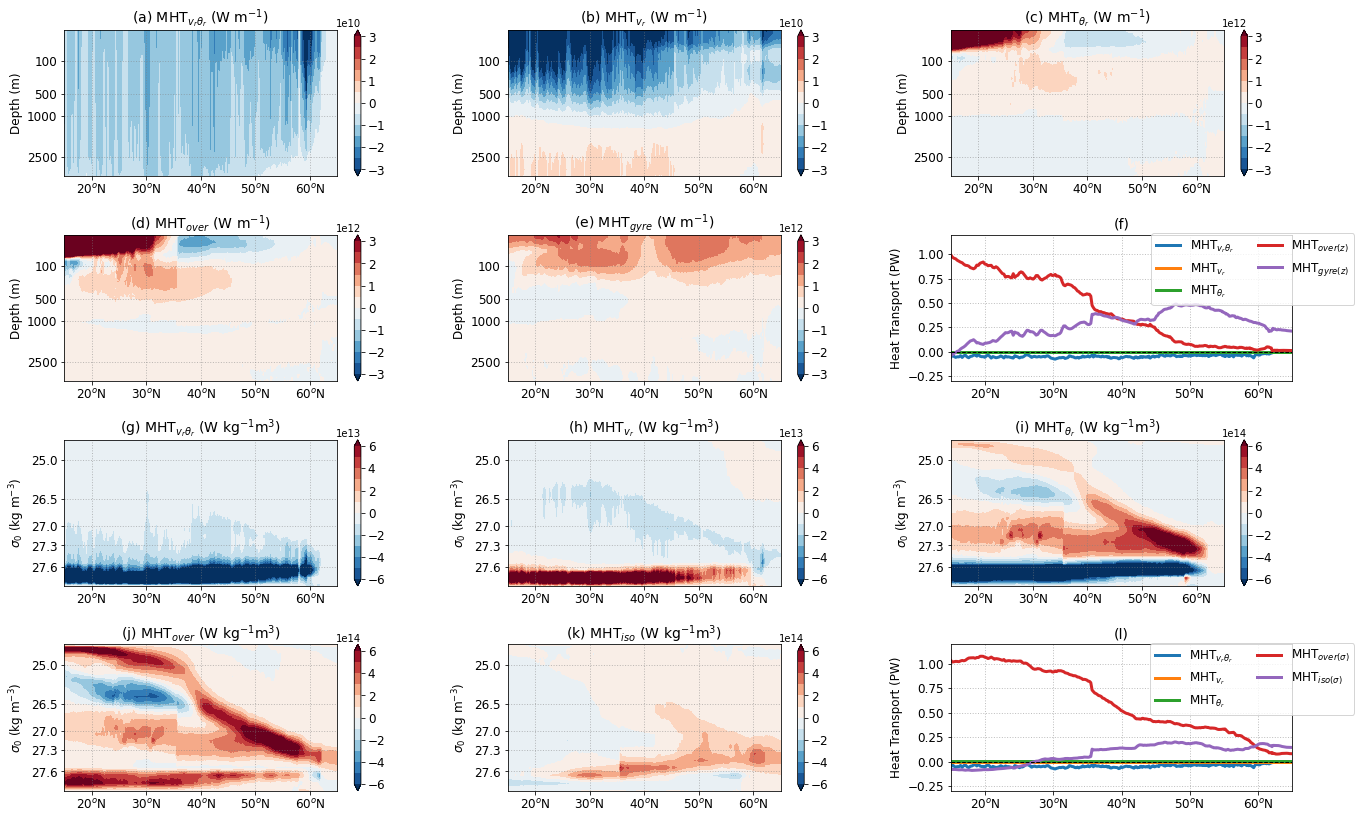

In [21]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fs = 12 # font size

dz = ds_drift['lev_outer'].diff(dim = 'lev_outer').rename({'lev_outer':'lev'}).drop('lev')
dz = dz.assign_coords(lev = ds_drift['lev'])

dsigma = ds_drift['sigma0_outer'].diff(dim = 'sigma0_outer').rename({'sigma0_outer':'sigma0'}).drop('sigma0')
dsigma = dsigma.assign_coords(sigma0 = ds_drift['sigma0'])

lat = ds_drift['latitude'].isel(r=0,time=0)

props = dict(boxstyle='round', facecolor='white')

grid1 = plt.GridSpec(4, 3, wspace=0.3, hspace=0.4)
fig = plt.figure(figsize=[22,14])

#import matplotlib.ticker                         # here's where the formatter is
#cbformat = matplotlib.ticker.ScalarFormatter()   # create the formatter
#cbformat.set_powerlimits((-2,2)) 

#############################################
# ------------ MHT in z-space -------------- #
#############################################

var_list = ['MHT_z_baro', 'MHT_overturning_z_baro_v', 'MHT_overturning_z_baro_theta', 'MHT_overturning_z']
tilt_list = [r'(a) MHT$_{v_r\theta_r}$ (W m$^{-1}$)', r'(b) MHT$_{v_r}$ (W m$^{-1}$)', r'(c) MHT$_{\theta_r}$ (W m$^{-1}$)', 
             r'(d) MHT$_{over}$ (W m$^{-1}$)', r'(e) MHT$_{gyre}$ (W m$^{-1}$)']
rng_z = [3e10, 3e10, 3e12, 3e12, 3e12]

j = 0
for i in range(0,5):
    
    if(i<4):
        tmp = (ds_drift[var_list[i]]).mean(['r','time']).isel(j_c=slice(0,340)) / dz
    else:
        tmp = (ds_drift['MHT_z'] - ds_drift['MHT_z_baro'] - ds_drift['MHT_overturning_z_baro_v'] - ds_drift['MHT_overturning_z_baro_theta'] -
               ds_drift['MHT_overturning_z']).mean(['r', 'time']).isel(j_c=slice(0,340)) / (dz )
        
    tmp = tmp.assign_coords(j_c=lat.isel(j_c=slice(0,340)))

    tmp = tmp.drop('lev').assign_coords(lev = (ds_drift['lev'].values)**0.4) 

    if(i<3):
        ax = fig.add_subplot(grid1[0, i])
    else:
        ax = fig.add_subplot(grid1[1, i-3])
        
    p = tmp.plot.contourf(ax=ax, x='j_c', y='lev', levels = 13, vmin = -rng_z[i], vmax = rng_z[i],
                          cmap=cmaps.MPL_RdBu_r, add_labels=False, add_colorbar=False, extend='both')
    ax.set_ylabel('Depth (m)', fontsize=12)
    cb = fig.colorbar(p, ax=ax, extend='both') #, orientation="horizontal", pad=0.3)
    cb.ax.tick_params(labelsize=fs) #, rotation = 90)
    ax.set_title(tilt_list[i], fontsize=fs+2)
    plt.xticks(np.arange(20,61,10), [r'$20^o$N', r'$30^o$N', r'$40^o$N', r'$50^o$N', r'$60^o$N'], fontsize = fs);
    plt.yticks((np.array([100., 500., 1000., 2500.]))**0.4, [r'100', r'500', r'1000', r'2500'])
    ax.set_ylim([1., 3500.**0.4])
    ax.set_xlim([15., 65.])
    ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
    plt.gca().invert_yaxis()
    plt.yticks(fontsize = fs);
    plt.xticks(fontsize = fs);
    
ax = fig.add_subplot(grid1[1, 2])
lab_list = [r'MHT$_{v_r\theta_r}$', r'MHT$_{v_r}$', r'MHT$_{\theta_r}$', r'MHT$_{over(z)}$']
for i in range(0,4):
    tmp = (ds_drift[var_list[i]]).mean(['r','time']).sum('lev') / 1e15
    ax.plot(lat, tmp, lw=3., label=lab_list[i])
    
tmp = (ds_drift['MHT_z'] - ds_drift['MHT_z_baro'] - ds_drift['MHT_overturning_z_baro_v'] - ds_drift['MHT_overturning_z_baro_theta'] -
       ds_drift['MHT_overturning_z']).mean(['r', 'time']).sum('lev')/1e15
ax.plot(lat, tmp, lw=3., label=r'MHT$_{gyre(z)}$')
ax.axhline(y=0, ls='--', lw=1, color='k')
ax.set_ylabel('Heat Transport (PW)', fontsize=12)
plt.xticks(np.arange(20,61,10), [r'$20^o$N', r'$30^o$N', r'$40^o$N', r'$50^o$N', r'$60^o$N'], fontsize = fs);
ax.set_xlim([15., 65.])
ax.set_ylim([-0.3, 1.2])
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
plt.yticks(fontsize = fs);
plt.xticks(fontsize = fs);
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.05), fontsize=12, ncol=2)
ax.set_title('(f)', fontsize=fs+2)

#############################################
# ------------ MHT in sigma-space -------------- #
#############################################

var_list = ['MHT_sigma_baro', 'MHT_overturning_sigma_baro_v', 'MHT_overturning_sigma_baro_theta', 'MHT_overturning_sigma']
tilt_list = [r'(g) MHT$_{v_r\theta_r}$ (W kg$^{-1}$m$^{3}$)', r'(h) MHT$_{v_r}$ (W kg$^{-1}$m$^{3}$)', r'(i) MHT$_{\theta_r}$ (W kg$^{-1}$m$^{3}$)', 
             r'(j) MHT$_{over}$ (W kg$^{-1}$m$^{3}$)', r'(k) MHT$_{iso}$ (W kg$^{-1}$m$^{3}$)']
rng_z = [6e13, 6e13, 6e14, 6e14, 6e14]

j = 0
for i in range(0,5):
    
    if(i<4):
        tmp = (ds_drift[var_list[i]]).mean(['r','time']).isel(j_c=slice(0,340)) / dsigma
    else:
        tmp = (ds_drift['MHT_sigma'] - ds_drift['MHT_sigma_baro'] - ds_drift['MHT_overturning_sigma_baro_v'] - ds_drift['MHT_overturning_sigma_baro_theta'] -
               ds_drift['MHT_overturning_sigma']).mean(['r', 'time']).isel(j_c=slice(0,340)) / (dsigma)
        
    tmp = tmp.assign_coords(j_c=lat.isel(j_c=slice(0,340)))
    rng_nl = ds_drift['sigma0'].values * np.arange(0, len(ds_drift['sigma0']))**2
    tmp = tmp.drop('sigma0').assign_coords(sigma0 = rng_nl)
    
    if(i<3):
        ax = fig.add_subplot(grid1[2, i])
    else:
        ax = fig.add_subplot(grid1[3, i-3])
        
    p = tmp.plot.contourf(ax=ax, x='j_c', y='sigma0', levels = 13, vmin = -rng_z[i], vmax = rng_z[i],
                          cmap=cmaps.MPL_RdBu_r, add_labels=False, add_colorbar=False, extend='both')
    ax.set_ylabel(r'$\sigma_0$ (kg m$^{-3}$)', fontsize=12)
    cb = fig.colorbar(p, ax=ax, extend='both') #, orientation="horizontal", pad=0.3)
    cb.ax.tick_params(labelsize=fs) #, rotation = 90)
    ax.set_title(tilt_list[i], fontsize=fs+2)
    plt.xticks(np.arange(20,61,10), [r'$20^o$N', r'$30^o$N', r'$40^o$N', r'$50^o$N', r'$60^o$N'], fontsize = fs);
    ax.set_xlim([15., 65.])
    ax.set_ylim([0., 4.235985e+04])
    plt.yticks([15.5**2 * 25., 25.5**2*26.5, 30.5**2*27, 33.5**2*27.3, 36.5**2*27.6], [25.0, 26.5, 27.0, 27.3, 27.6])
    ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
    plt.gca().invert_yaxis()
    plt.yticks(fontsize = fs);
    plt.xticks(fontsize = fs);
    
    #cb.formatter.set_powerlimits((0, 0))
    #cb.formatter.set_useMathText(True)
    #plt.gca().yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
    
ax = fig.add_subplot(grid1[3, 2])
lab_list = [r'MHT$_{v_r\theta_r}$', r'MHT$_{v_r}$', r'MHT$_{\theta_r}$', r'MHT$_{over(\sigma)}$']
for i in range(0,4):
    tmp = (ds_drift[var_list[i]]).mean(['r','time']).sum('sigma0') / 1e15
    ax.plot(lat, tmp, lw=3., label=lab_list[i])
    
tmp = (ds_drift['MHT_sigma'] - ds_drift['MHT_sigma_baro'] - ds_drift['MHT_overturning_sigma_baro_v'] - ds_drift['MHT_overturning_sigma_baro_theta'] -
               ds_drift['MHT_overturning_sigma']).mean(['r', 'time']).sum('sigma0')/1e15
ax.plot(lat, tmp, lw=3., label=r'MHT$_{iso(\sigma)}$')
ax.axhline(y=0, ls='--', lw=1, color='k')
ax.set_ylabel('Heat Transport (PW)', fontsize=12)
plt.xticks(np.arange(20,61,10), [r'$20^o$N', r'$30^o$N', r'$40^o$N', r'$50^o$N', r'$60^o$N'], fontsize = fs);
ax.set_xlim([15., 65.])
ax.set_ylim([-0.3, 1.2])
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
plt.yticks(fontsize = fs);
plt.xticks(fontsize = fs);
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.05), fontsize=12, ncol=2)
ax.set_title('(l)', fontsize=fs+2)

fig.savefig('/home/users/hkhatri/Plots/Figures_GRL_2022/Climatology_support.png', dpi=300,bbox_inches='tight');
fig.savefig('/home/users/hkhatri/Plots/Figures_GRL_2022/Climatology_support.pdf', dpi=300,bbox_inches='tight');

## Additional Checks

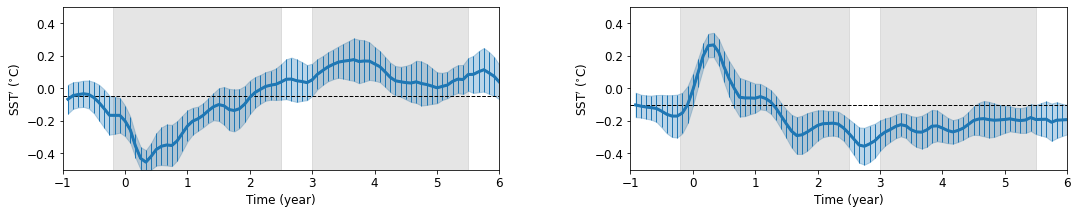

In [15]:
grid1 = plt.GridSpec(1, 2, wspace=0.3, hspace=0.6)
fig = plt.figure(figsize=[18,3])

N = 114 - 1 # 114 for NAOp and 133 for NAOn (cutoff 13 hpa) 
std_err = (1.96/np.sqrt(np.ceil(N)))
col = plt.cm.tab10(np.linspace(0.,0.35,4))

ax = fig.add_subplot(grid1[0, 0])

ax.plot(tos_NAOp_mean['time.year'] + tos_NAOp_mean['time.month']/12 - 1962, tos_NAOp_mean, lw = 2.,  color=col[0],  label=r' ')
ax.fill_between(tos_NAOp_mean['time.year'] + tos_NAOp_mean['time.month']/12 - 1962, (tos_NAOp_mean.values - std_err*tos_NAOp_std.values), 
                        (tos_NAOp_mean.values + std_err*tos_NAOp_std.values), alpha=0.3,  color=col[0])
ax.errorbar(tos_NAOp_mean['time.year'] + tos_NAOp_mean['time.month']/12 - 1962, tos_NAOp_mean.values, 
            yerr=std_err*tos_NAOp_std.values, color=col[0], lw=3., elinewidth=1.)
ax.axhline(y=-0.05, ls='--', lw=1, color='k')
ax.set_xlabel('Time (year)', fontsize=12)
ax.set_ylabel(r'SST$^{\prime}$ ($^{\circ}$C)', fontsize=12) #, color=col[0])
ax.set_xlim([-1., 6.])
ax.set_ylim([-0.5, 0.5])
plt.yticks(fontsize = 12) #, color=col[0]); 
plt.xticks(fontsize = 12);
ax.axvspan(-0.2, 2.5, alpha=0.2, color='gray')
ax.axvspan(3.0, 5.5, alpha=0.2, color='gray')

N = 133 - 1 # 114 for NAOp and 133 for NAOn (cutoff 13 hpa) 
std_err = (1.96/np.sqrt(np.ceil(N)))
col = plt.cm.tab10(np.linspace(0.,0.35,4))

ax = fig.add_subplot(grid1[0, 1])

ax.plot(tos_NAOn_mean['time.year'] + tos_NAOn_mean['time.month']/12 - 1962, tos_NAOn_mean, lw = 2.,  color=col[0],  label=r' ')
ax.fill_between(tos_NAOn_mean['time.year'] + tos_NAOn_mean['time.month']/12 - 1962, (tos_NAOn_mean.values - std_err*tos_NAOn_std.values), 
                        (tos_NAOn_mean.values + std_err*tos_NAOn_std.values), alpha=0.3,  color=col[0])
ax.errorbar(tos_NAOn_mean['time.year'] + tos_NAOn_mean['time.month']/12 - 1962, tos_NAOn_mean.values, 
            yerr=std_err*tos_NAOn_std.values, color=col[0], lw=3., elinewidth=1.)
ax.axhline(y=-0.1, ls='--', lw=1, color='k')
ax.set_xlabel('Time (year)', fontsize=12)
ax.set_ylabel(r'SST$^{\prime}$ ($^{\circ}$C)', fontsize=12) #, color=col[0])
ax.set_xlim([-1., 6.])
ax.set_ylim([-0.5, 0.5])
plt.yticks(fontsize = 12) #, color=col[0]); 
plt.xticks(fontsize = 12);
ax.axvspan(-0.2, 2.5, alpha=0.2, color='gray')
ax.axvspan(3.0, 5.5, alpha=0.2, color='gray')

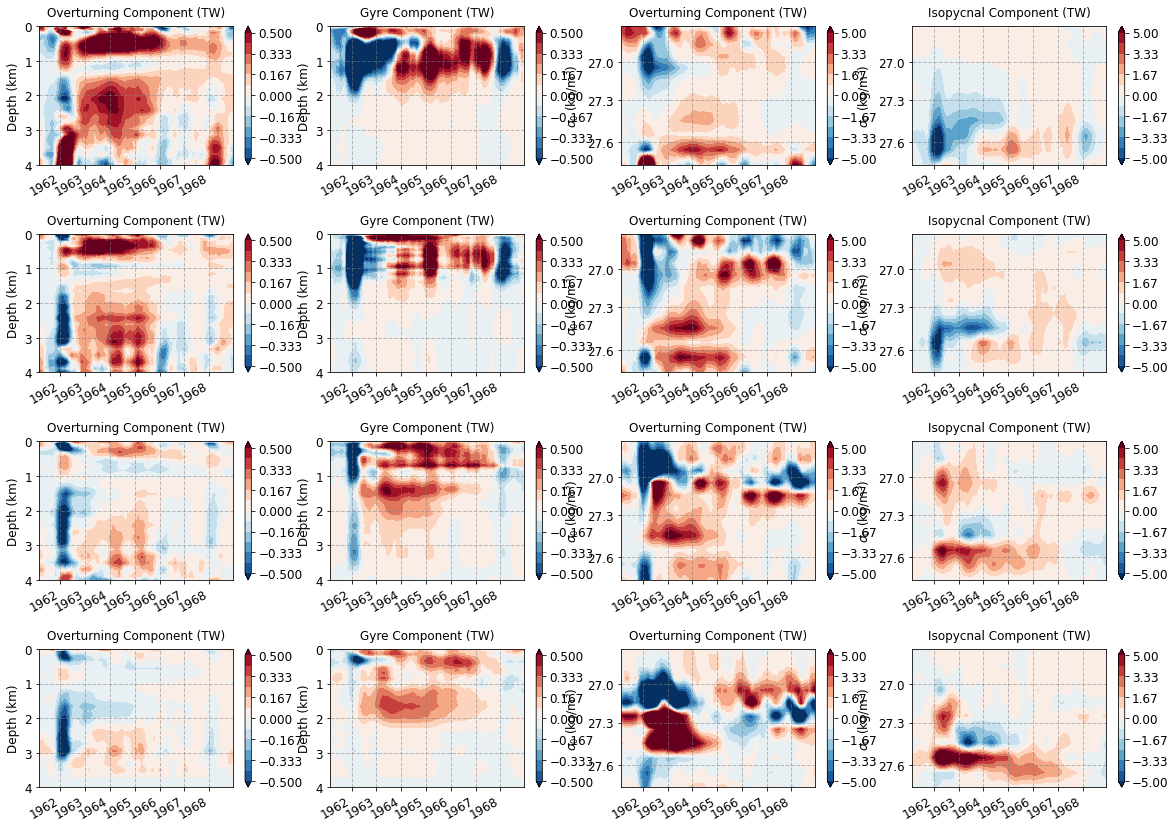

In [20]:
grid1 = plt.GridSpec(4, 4, wspace=0.2, hspace=0.5)
fig = plt.figure(figsize=[20,14])

lat = ds_NAOp['latitude']

rng_z = [0.5, 0.5, 0.5]
rng_sigma = [5., 5., 5.]
ind = 65


for j in range(0,4):
    
    titl = ['Overturning Component (TW)', 'Gyre Component (TW)']
    for i in range(0,2):

        if(i==0):
            tmp = ds_NAOp['MHT_overturning_z'].sel(j_c= j*5 + 40., method='nearest')/ 1e12 # convert to GW
        else:
            tmp = ds_NAOp['MHT_gyre_z'].sel(j_c= j*5 + 40., method='nearest') / 1e12 # convert to GW

        ax = fig.add_subplot(grid1[j, i])
        p = tmp.plot.contourf(ax=ax, x='time', y='lev', levels = 13, vmin = -rng_z[i], vmax = rng_z[i],
                              cmap='RdBu_r', add_labels=False, add_colorbar=False, extend='both')
        ax.set_ylabel('Depth (km)', fontsize=12)
        cb = fig.colorbar(p, ax=ax, extend='both')
        cb.ax.tick_params(labelsize=12)
        #plt.xticks(np.arange(20,71,10), [r'$20^o$N', r'$30^o$N', r'$40^o$N', r'$50^o$N', r'$60^o$N', r'$70^o$N'], fontsize = 12);
        plt.yticks(np.arange(0,4500,1000), [r'0', r'1', r'2', r'3', r'4'])
        ax.set_ylim([0., 4000.])
        #ax.set_xlim([15., 65.])
        ax.grid(color='gray', alpha=0.5, linestyle='--', lw=1.)
        ax.set_title(titl[i], pad=10, fontsize=12)
        plt.gca().invert_yaxis()
        plt.yticks(fontsize = 12);
        plt.xticks(fontsize = 12);
    
    titl = ['Overturning Component (TW)', 'Isopycnal Component (TW)']
    for i in range(0,2):

        if(i==0):
            tmp = ds_NAOp['MHT_overturning_sigma'].sel(j_c= j*5 + 40., method='nearest')/ 1e12 # convert to GW
        else:
            tmp = ds_NAOp['MHT_isopycnal_sigma'].sel(j_c= j*5 + 40., method='nearest')/ 1e12 # convert to GW

        rng_nl = ds_NAOp['sigma0']* np.arange(0, len(ds_NAOp['sigma0']))**2
        tmp = tmp.drop('sigma0').assign_coords(sigma0 = rng_nl)

        ax = fig.add_subplot(grid1[j, i+2])
        p = tmp.plot.contourf(ax=ax, x='time', y='sigma0', levels = 13, vmin = -rng_sigma[i], vmax = rng_sigma[i],
                              cmap='RdBu_r', add_labels=False, add_colorbar=False, extend='both')
        ax.set_ylabel(r'$\sigma_0$ (kg/m$^{3}$)', fontsize=12)
        cb = fig.colorbar(p, ax=ax, extend='both')
        cb.ax.tick_params(labelsize=12)
        #ax.set_xlim([15., 65.])
        plt.yticks([15.5**2 * 25., 25.5**2*26.5, 30.5**2*27, 33.5**2*27.3, 36.5**2*27.6], [25.0, 26.5, 27.0, 27.3, 27.6])
        ax.set_ylim([20000., 40000.])
        ax.grid(color='gray', alpha=0.5, linestyle='--', lw=1.)
        ax.set_title(titl[i], pad=10, fontsize=12)
        plt.gca().invert_yaxis()
        plt.yticks(fontsize = 12);
        plt.xticks(fontsize = 12); 

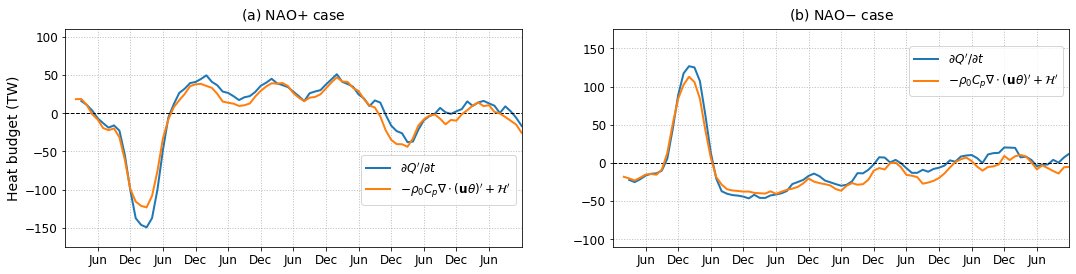

In [27]:
grid1 = plt.GridSpec(1, 2, wspace=0.2, hspace=0.5)
fig = plt.figure(figsize=[18,4])

fs =12

ax = fig.add_subplot(grid1[0, 0])
ax.plot(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962 + 1/12, ds_NAOp['Heat_Content_1300']/1e12, lw = 2.,
            label=r'${\partial Q^{\prime}/\partial t}$')
ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962, (- ds_NAOp['Heat_Divergence'] + ds_NAOp['hfds'])/1e12, lw = 2.,
            label=r'$-\rho_0C_p{\nabla\cdot({{\bf{u}}\theta})^{\prime}} + \mathcal{H}^{\prime}$')
    
ax.axhline(y=0, ls='--', lw=1, color='k')
ax.set_ylabel(r'Heat budget (TW)', fontsize=fs+2)
ax.set_title(r'(a) NAO$+$ case', pad=10, fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1., 0.45), fontsize=12, ncol=1)
plt.xticks(np.arange(-0.5,6,0.5), ['Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun'], fontsize = fs);
plt.yticks(fontsize = 12); plt.xticks(fontsize = 12);
ax.set_xlim([-1., 6.]);
ax.set_ylim([-175., 110.]);
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)

ax = fig.add_subplot(grid1[0, 1])
ax.plot(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962 + 1/12, ds_NAOn['Heat_Content_1300']/1e12, lw = 2.,
            label=r'${\partial Q^{\prime}/\partial t}$')
ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962, (- ds_NAOn['Heat_Divergence'] + ds_NAOn['hfds'])/1e12, lw = 2.,
            label=r'$-\rho_0C_p{\nabla\cdot({{\bf{u}}\theta})^{\prime}} + \mathcal{H}^{\prime}$')
    
ax.axhline(y=0, ls='--', lw=1, color='k')
plt.legend(loc='upper right', bbox_to_anchor=(1., 0.95), fontsize=12, ncol=1)
plt.xticks(np.arange(-0.5,6,0.5), ['Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun'], fontsize = fs);
plt.yticks(fontsize = 12); plt.xticks(fontsize = 12);
ax.set_xlim([-1., 6.]);
ax.set_ylim([-110., 175.]);
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
ax.set_title(r'(b) NAO$-$ case', pad=10, fontsize=14)

fig.savefig('/home/users/hkhatri/Plots/Figures_GRL_2022/Figure5_support.png', dpi=300,bbox_inches='tight');
fig.savefig('/home/users/hkhatri/Plots/Figures_GRL_2022/Figure5_support.pdf', dpi=300,bbox_inches='tight');

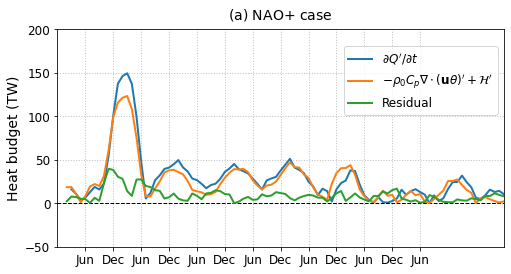

In [21]:
grid1 = plt.GridSpec(1, 1, wspace=0.2, hspace=0.5)
fig = plt.figure(figsize=[8,4])

fs =12

ax = fig.add_subplot(grid1[0, 0])
ax.plot(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962 + 1/12, abs(ds_NAOp['Heat_Content_1300'])/1e12, lw = 2.,
            label=r'${\partial Q^{\prime}/\partial t}$')
ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962, abs(- ds_NAOp['Heat_Divergence'] + ds_NAOp['hfds'])/1e12, lw = 2.,
            label=r'$-\rho_0C_p{\nabla\cdot({{\bf{u}}\theta})^{\prime}} + \mathcal{H}^{\prime}$')

ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962, abs(ds_NAOp['Heat_Content_1300']/1e12 - 
            (- ds_NAOp['Heat_Divergence'] + ds_NAOp['hfds'])/1e12), lw = 2.,
            label=r'Residual')
    
ax.axhline(y=0, ls='--', lw=1, color='k')
ax.set_ylabel(r'Heat budget (TW)', fontsize=fs+2)
ax.set_title(r'(a) NAO$+$ case', pad=10, fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1., 0.95), fontsize=12, ncol=1)
plt.xticks(np.arange(-0.5,6,0.5), ['Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun'], fontsize = fs);
plt.yticks(fontsize = 12); plt.xticks(fontsize = 12);
ax.set_xlim([-1., 7.]);
ax.set_ylim([-50., 200.]);
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)

In [31]:
tmp1 = abs(ds_NAOp['Heat_Content_1300']).mean('time') - abs(- ds_NAOp['Heat_Divergence'] + ds_NAOp['hfds']).mean('time') 
tmp2 = abs(ds_NAOp['Heat_Content_1300']).mean('time')
tmp3 = (abs((- ds_NAOp['Heat_Divergence'] + ds_NAOp['hfds']))).mean('time') 

print(tmp1, tmp2, tmp3)
print('Residual percentage = ', (tmp1 / tmp2) * 100)

<xarray.DataArray ()>
array(3.008396e+12, dtype=float32) <xarray.DataArray 'Heat_Content_1300' ()>
array(2.847771e+13, dtype=float32) <xarray.DataArray ()>
array(2.5469313e+13, dtype=float32)
Residual percentage =  <xarray.DataArray ()>
array(10.56403816)


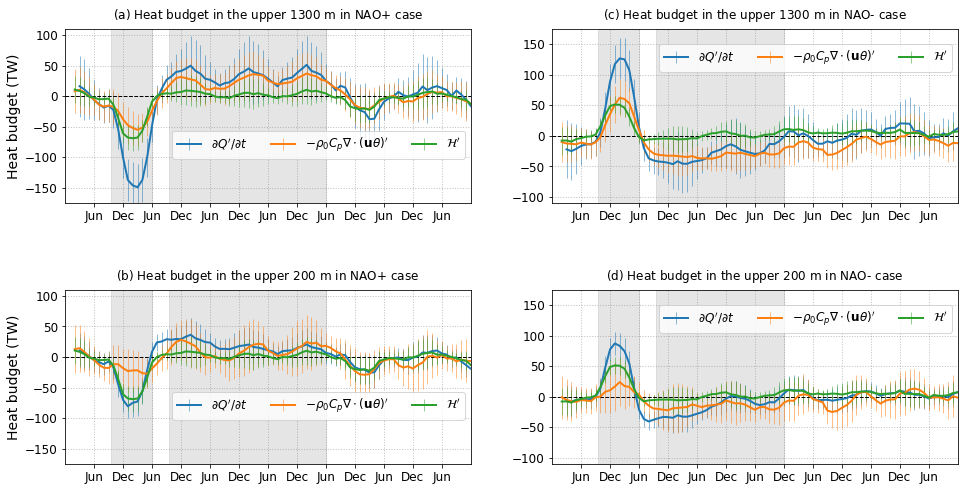

In [8]:
## Compare heat budget terms in upper 1300 m vs upper 200 m

# ----------------------------------- #
# ------- Heat Budget timeseries ----- #
# ----------------------------------- #

grid1 = plt.GridSpec(2, 2, wspace=0.2, hspace=0.5)
fig = plt.figure(figsize=[16,8])

fs =12

ax = fig.add_subplot(grid1[0, 0])
ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962 + 1/12, ds_NAOp['Heat_Content_1300']/1e12, 
            yerr=(ds_NAOp['Heat_Content_1300_confidence_upper'] -  
                  ds_NAOp['Heat_Content_1300_confidence_lower'])/1e12, lw = 2., elinewidth=0.5, 
            label=r'${\partial Q^{\prime}/\partial t}$')
ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962, - ds_NAOp['Heat_Divergence']/1e12, 
            yerr=(ds_NAOp['Heat_Divergence_confidence_upper'] -  
                  ds_NAOp['Heat_Divergence_confidence_lower'])/1e12, lw = 2., elinewidth=0.5, 
            label=r'$-\rho_0C_p{\nabla\cdot({{\bf{u}}\theta})^{\prime}}$')
ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962, ds_NAOp['hfds']/1e12, 
            yerr=(ds_NAOp['hfds_confidence_upper'] -  
                  ds_NAOp['hfds_confidence_lower'])/1e12, lw = 2., elinewidth=0.5, 
            label=r'$\mathcal{H}^{\prime}$')
    
ax.axhline(y=0, ls='--', lw=1, color='k')
ax.set_ylabel(r'Heat budget (TW)', fontsize=fs+2)
ax.set_title('(a) Heat budget in the upper $1300$ m in NAO+ case', pad=10, fontsize=12)
plt.legend(loc='upper right', bbox_to_anchor=(1., 0.45), fontsize=12, ncol=3)
plt.xticks(np.arange(-0.5,6,0.5), ['Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun'], fontsize = fs);
plt.yticks(fontsize = 12); plt.xticks(fontsize = 12);
ax.set_xlim([-1., 6.]);
ax.set_ylim([-175., 110.]);
ax.axvspan(-0.2, 0.5, alpha=0.2, color='gray')
ax.axvspan(0.8, 3.5, alpha=0.2, color='gray')
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)

ax = fig.add_subplot(grid1[0, 1])
ax.errorbar(ds_NAOn['time.year'] + ds_NAOn['time.month']/12 - 1962 + 1/12, ds_NAOn['Heat_Content_1300']/1e12, 
            yerr=(ds_NAOn['Heat_Content_1300_confidence_upper'] -  
                  ds_NAOn['Heat_Content_1300_confidence_lower'])/1e12, lw = 2., elinewidth=0.5, 
            label=r'${\partial Q^{\prime}/\partial t}$')
ax.errorbar(ds_NAOn['time.year'] + ds_NAOn['time.month']/12 - 1962, - ds_NAOn['Heat_Divergence']/1e12, 
            yerr=(ds_NAOn['Heat_Divergence_confidence_upper'] -  
                  ds_NAOn['Heat_Divergence_confidence_lower'])/1e12, lw = 2., elinewidth=0.5, 
            label=r'$-\rho_0C_p{\nabla\cdot({{\bf{u}}\theta})^{\prime}}$')
ax.errorbar(ds_NAOn['time.year'] + ds_NAOn['time.month']/12 - 1962, ds_NAOn['hfds']/1e12, 
            yerr=(ds_NAOn['hfds_confidence_upper'] -  
                  ds_NAOn['hfds_confidence_lower'])/1e12, lw = 2., elinewidth=0.5, 
            label=r'$\mathcal{H}^{\prime}$')
    
ax.axhline(y=0, ls='--', lw=1, color='k')
plt.legend(loc='upper right', bbox_to_anchor=(1., 0.95), fontsize=12, ncol=3)
plt.xticks(np.arange(-0.5,6,0.5), ['Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun'], fontsize = fs);
plt.yticks(fontsize = 12); plt.xticks(fontsize = 12);
ax.set_xlim([-1., 6.]);
ax.set_ylim([-110., 175.]);
ax.set_title('(c) Heat budget in the upper $1300$ m in NAO- case', pad=10, fontsize=12)
ax.axvspan(-0.2, 0.5, alpha=0.2, color='gray')
ax.axvspan(0.8, 3.0, alpha=0.2, color='gray')
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)

ax = fig.add_subplot(grid1[1, 0])
ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962 + 1/12, ds_NAOp['Heat_Content_200']/1e12, 
            yerr=(ds_NAOp['Heat_Content_200_confidence_upper'] -  
                  ds_NAOp['Heat_Content_200_confidence_lower'])/1e12, lw = 2., elinewidth=0.5, 
            label=r'${\partial Q^{\prime}/\partial t}$')
ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962, - ds_NAOp['Heat_Divergence_200']/1e12, 
            yerr=(ds_NAOp['Heat_Divergence_200_confidence_upper'] -  
                  ds_NAOp['Heat_Divergence_200_confidence_lower'])/1e12, lw = 2., elinewidth=0.5, 
            label=r'$-\rho_0C_p{\nabla\cdot({{\bf{u}}\theta})^{\prime}}$')
ax.errorbar(ds_NAOp['time.year'] + ds_NAOp['time.month']/12 - 1962, ds_NAOp['hfds']/1e12, 
            yerr=(ds_NAOp['hfds_confidence_upper'] -  
                  ds_NAOp['hfds_confidence_lower'])/1e12, lw = 2., elinewidth=0.5, 
            label=r'$\mathcal{H}^{\prime}$')
    
ax.axhline(y=0, ls='--', lw=1, color='k')
ax.set_ylabel(r'Heat budget (TW)', fontsize=fs+2)
ax.set_title('(b) Heat budget in the upper $200$ m in NAO+ case', pad=10, fontsize=12)
plt.legend(loc='upper right', bbox_to_anchor=(1., 0.45), fontsize=12, ncol=3)
plt.xticks(np.arange(-0.5,6,0.5), ['Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun'], fontsize = fs);
plt.yticks(fontsize = 12); plt.xticks(fontsize = 12);
ax.set_xlim([-1., 6.]);
ax.set_ylim([-175., 110.]);
ax.axvspan(-0.2, 0.5, alpha=0.2, color='gray')
ax.axvspan(0.8, 3.5, alpha=0.2, color='gray')
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)

ax = fig.add_subplot(grid1[1, 1])
ax.errorbar(ds_NAOn['time.year'] + ds_NAOn['time.month']/12 - 1962 + 1/12, ds_NAOn['Heat_Content_200']/1e12, 
            yerr=(ds_NAOn['Heat_Content_200_confidence_upper'] -  
                  ds_NAOn['Heat_Content_200_confidence_lower'])/1e12, lw = 2., elinewidth=0.5, 
            label=r'${\partial Q^{\prime}/\partial t}$')
ax.errorbar(ds_NAOn['time.year'] + ds_NAOn['time.month']/12 - 1962, - ds_NAOn['Heat_Divergence_200']/1e12, 
            yerr=(ds_NAOn['Heat_Divergence_200_confidence_upper'] -  
                  ds_NAOn['Heat_Divergence_200_confidence_lower'])/1e12, lw = 2., elinewidth=0.5, 
            label=r'$-\rho_0C_p{\nabla\cdot({{\bf{u}}\theta})^{\prime}}$')
ax.errorbar(ds_NAOn['time.year'] + ds_NAOn['time.month']/12 - 1962, ds_NAOn['hfds']/1e12, 
            yerr=(ds_NAOn['hfds_confidence_upper'] -  
                  ds_NAOn['hfds_confidence_lower'])/1e12, lw = 2., elinewidth=0.5, 
            label=r'$\mathcal{H}^{\prime}$')
    
ax.axhline(y=0, ls='--', lw=1, color='k')
plt.legend(loc='upper right', bbox_to_anchor=(1., 0.95), fontsize=12, ncol=3)
plt.xticks(np.arange(-0.5,6,0.5), ['Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun', 'Dec', 'Jun'], fontsize = fs);
plt.yticks(fontsize = 12); plt.xticks(fontsize = 12);
ax.set_xlim([-1., 6.]);
ax.set_ylim([-110., 175.]);
ax.set_title('(d) Heat budget in the upper $200$ m in NAO- case', pad=10, fontsize=12)
ax.axvspan(-0.2, 0.5, alpha=0.2, color='gray')
ax.axvspan(0.8, 3.0, alpha=0.2, color='gray')
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)

### Freshwater transport

Text(0.5, 1.0, '(l)')

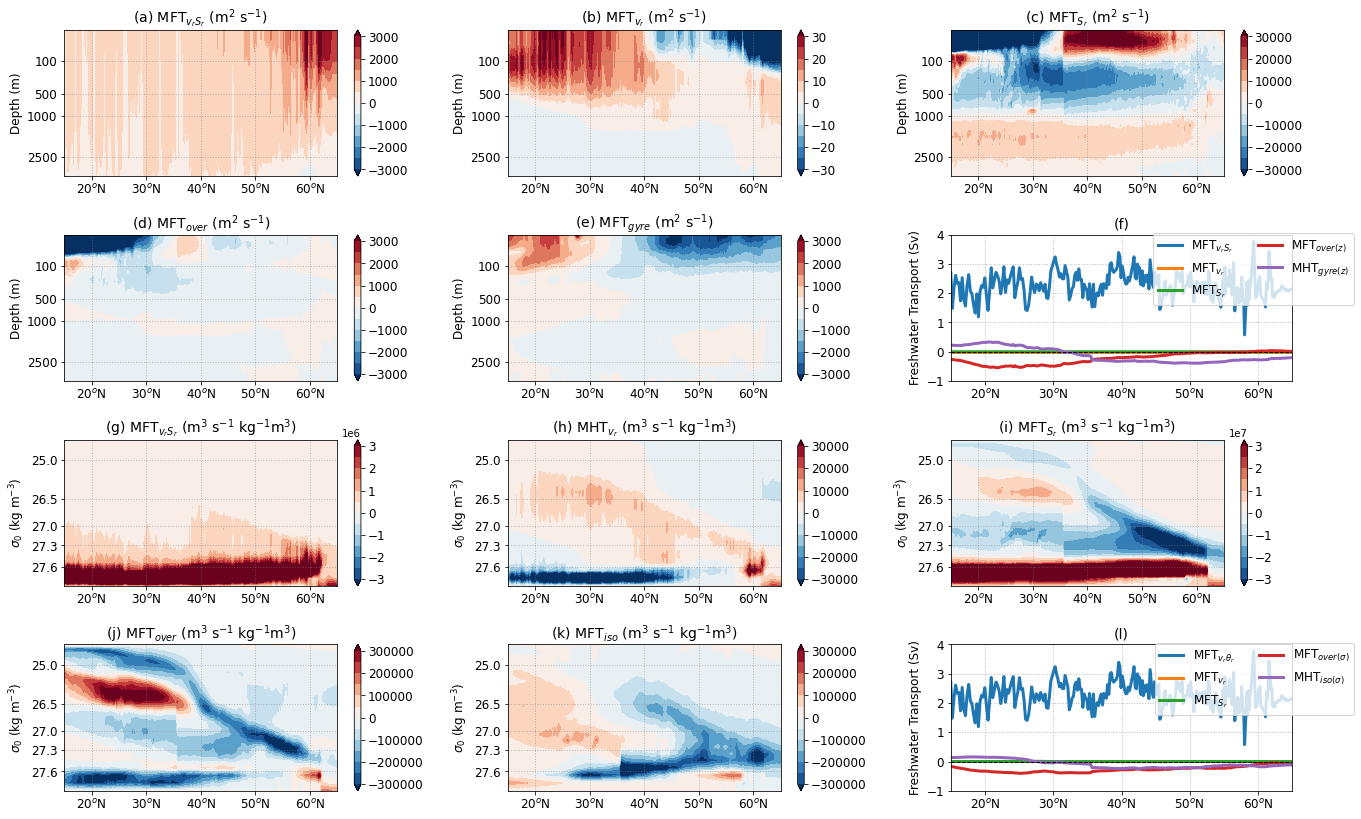

In [20]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fs = 12 # font size

dz = ds_drift['lev_outer'].diff(dim = 'lev_outer').rename({'lev_outer':'lev'}).drop('lev')
dz = dz.assign_coords(lev = ds_drift['lev'])

dsigma = ds_drift['sigma0_outer'].diff(dim = 'sigma0_outer').rename({'sigma0_outer':'sigma0'}).drop('sigma0')
dsigma = dsigma.assign_coords(sigma0 = ds_drift['sigma0'])

lat = ds_drift['latitude'].isel(r=0,time=0)

props = dict(boxstyle='round', facecolor='white')

grid1 = plt.GridSpec(4, 3, wspace=0.3, hspace=0.4)
fig = plt.figure(figsize=[22,14])

#import matplotlib.ticker                         # here's where the formatter is
#cbformat = matplotlib.ticker.ScalarFormatter()   # create the formatter
#cbformat.set_powerlimits((-2,2)) 

#############################################
# ------------ MHT in z-space -------------- #
#############################################

var_list = ['MFT_z_baro', 'MFT_overturning_z_baro_v', 'MFT_overturning_z_baro_so', 'MFT_overturning_z']
tilt_list = [r'(a) MFT$_{v_rS_r}$ (m$^2$ s$^{-1}$)', r'(b) MFT$_{v_r}$ (m$^2$ s$^{-1}$)', r'(c) MFT$_{S_r}$ (m$^2$ s$^{-1}$)', 
             r'(d) MFT$_{over}$ (m$^2$ s$^{-1}$)', r'(e) MFT$_{gyre}$ (m$^2$ s$^{-1}$)']
rng_z = [3000, 30, 30000, 3000, 3000]

j = 0
for i in range(0,5):
    
    if(i<4):
        tmp = (ds_drift[var_list[i]]).mean(['r','time']).isel(j_c=slice(0,340)) / dz
    else:
        tmp = (ds_drift['MFT_z'] - ds_drift['MFT_z_baro'] - ds_drift['MFT_overturning_z_baro_v'] - ds_drift['MFT_overturning_z_baro_so'] -
               ds_drift['MFT_overturning_z']).mean(['r', 'time']).isel(j_c=slice(0,340)) / (dz )
        
    tmp = tmp.assign_coords(j_c=lat.isel(j_c=slice(0,340)))

    tmp = tmp.drop('lev').assign_coords(lev = (ds_drift['lev'].values)**0.4) 

    if(i<3):
        ax = fig.add_subplot(grid1[0, i])
    else:
        ax = fig.add_subplot(grid1[1, i-3])
        
    p = tmp.plot.contourf(ax=ax, x='j_c', y='lev', levels = 13, vmin = -rng_z[i], vmax = rng_z[i],
                          cmap=cmaps.MPL_RdBu_r, add_labels=False, add_colorbar=False, extend='both')
    ax.set_ylabel('Depth (m)', fontsize=12)
    cb = fig.colorbar(p, ax=ax, extend='both') #, orientation="horizontal", pad=0.3)
    cb.ax.tick_params(labelsize=fs) #, rotation = 90)
    ax.set_title(tilt_list[i], fontsize=fs+2)
    plt.xticks(np.arange(20,61,10), [r'$20^o$N', r'$30^o$N', r'$40^o$N', r'$50^o$N', r'$60^o$N'], fontsize = fs);
    plt.yticks((np.array([100., 500., 1000., 2500.]))**0.4, [r'100', r'500', r'1000', r'2500'])
    ax.set_ylim([1., 3500.**0.4])
    ax.set_xlim([15., 65.])
    ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
    plt.gca().invert_yaxis()
    plt.yticks(fontsize = fs);
    plt.xticks(fontsize = fs);
    
ax = fig.add_subplot(grid1[1, 2])
lab_list = [r'MFT$_{v_rS_r}$', r'MFT$_{v_r}$', r'MFT$_{S_r}$', r'MFT$_{over(z)}$']
for i in range(0,4):
    tmp = (ds_drift[var_list[i]]).mean(['r','time']).sum('lev') / 1e6
    ax.plot(lat, tmp, lw=3., label=lab_list[i])
    
tmp = (ds_drift['MFT_z'] - ds_drift['MFT_z_baro'] - ds_drift['MFT_overturning_z_baro_v'] - ds_drift['MFT_overturning_z_baro_so'] -
       ds_drift['MFT_overturning_z']).mean(['r', 'time']).sum('lev')/1e6
ax.plot(lat, tmp, lw=3., label=r'MHT$_{gyre(z)}$')
ax.axhline(y=0, ls='--', lw=1, color='k')
ax.set_ylabel('Freshwater Transport (Sv)', fontsize=12)
plt.xticks(np.arange(20,61,10), [r'$20^o$N', r'$30^o$N', r'$40^o$N', r'$50^o$N', r'$60^o$N'], fontsize = fs);
ax.set_xlim([15., 65.])
ax.set_ylim([-1., 4.0])
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
plt.yticks(fontsize = fs);
plt.xticks(fontsize = fs);
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.05), fontsize=12, ncol=2)
ax.set_title('(f)', fontsize=fs+2)

#############################################
# ------------ MHT in sigma-space -------------- #
#############################################

var_list = ['MFT_sigma_baro', 'MFT_overturning_sigma_baro_v', 'MFT_overturning_sigma_baro_so', 'MFT_overturning_sigma']
tilt_list = [r'(g) MFT$_{v_rS_r}$ (m$^3$ s$^{-1}$ kg$^{-1}$m$^{3}$)', r'(h) MHT$_{v_r}$ (m$^3$ s$^{-1}$ kg$^{-1}$m$^{3}$)', 
             r'(i) MFT$_{S_r}$ (m$^3$ s$^{-1}$ kg$^{-1}$m$^{3}$)', 
             r'(j) MFT$_{over}$ (m$^3$ s$^{-1}$ kg$^{-1}$m$^{3}$)', r'(k) MFT$_{iso}$ (m$^3$ s$^{-1}$ kg$^{-1}$m$^{3}$)']
rng_z = [3e6, 3e4, 3e7, 3e5, 3e5]

j = 0
for i in range(0,5):
    
    if(i<4):
        tmp = (ds_drift[var_list[i]]).mean(['r','time']).isel(j_c=slice(0,340)) / dsigma
    else:
        tmp = (ds_drift['MFT_sigma'] - ds_drift['MFT_sigma_baro'] - ds_drift['MFT_overturning_sigma_baro_v'] - ds_drift['MFT_overturning_sigma_baro_so'] -
               ds_drift['MFT_overturning_sigma']).mean(['r', 'time']).isel(j_c=slice(0,340)) / (dsigma)
        
    tmp = tmp.assign_coords(j_c=lat.isel(j_c=slice(0,340)))
    rng_nl = ds_drift['sigma0'].values * np.arange(0, len(ds_drift['sigma0']))**2
    tmp = tmp.drop('sigma0').assign_coords(sigma0 = rng_nl)
    
    if(i<3):
        ax = fig.add_subplot(grid1[2, i])
    else:
        ax = fig.add_subplot(grid1[3, i-3])
        
    p = tmp.plot.contourf(ax=ax, x='j_c', y='sigma0', levels = 13, vmin = -rng_z[i], vmax = rng_z[i],
                          cmap=cmaps.MPL_RdBu_r, add_labels=False, add_colorbar=False, extend='both')
    ax.set_ylabel(r'$\sigma_0$ (kg m$^{-3}$)', fontsize=12)
    cb = fig.colorbar(p, ax=ax, extend='both') #, orientation="horizontal", pad=0.3)
    cb.ax.tick_params(labelsize=fs) #, rotation = 90)
    ax.set_title(tilt_list[i], fontsize=fs+2)
    plt.xticks(np.arange(20,61,10), [r'$20^o$N', r'$30^o$N', r'$40^o$N', r'$50^o$N', r'$60^o$N'], fontsize = fs);
    ax.set_xlim([15., 65.])
    ax.set_ylim([0., 4.235985e+04])
    plt.yticks([15.5**2 * 25., 25.5**2*26.5, 30.5**2*27, 33.5**2*27.3, 36.5**2*27.6], [25.0, 26.5, 27.0, 27.3, 27.6])
    ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
    plt.gca().invert_yaxis()
    plt.yticks(fontsize = fs);
    plt.xticks(fontsize = fs);
    
    #cb.formatter.set_powerlimits((0, 0))
    #cb.formatter.set_useMathText(True)
    #plt.gca().yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
    
ax = fig.add_subplot(grid1[3, 2])
lab_list = [r'MFT$_{v_r\theta_r}$', r'MFT$_{v_r}$', r'MFT$_{S_r}$', r'MFT$_{over(\sigma)}$']
for i in range(0,4):
    tmp = (ds_drift[var_list[i]]).mean(['r','time']).sum('sigma0') / 1e6
    ax.plot(lat, tmp, lw=3., label=lab_list[i])
    
tmp = (ds_drift['MFT_sigma'] - ds_drift['MFT_sigma_baro'] - ds_drift['MFT_overturning_sigma_baro_v'] - ds_drift['MFT_overturning_sigma_baro_so'] -
               ds_drift['MFT_overturning_sigma']).mean(['r', 'time']).sum('sigma0')/1e6
ax.plot(lat, tmp, lw=3., label=r'MHT$_{iso(\sigma)}$')
ax.axhline(y=0, ls='--', lw=1, color='k')
ax.set_ylabel('Freshwater Transport (Sv)', fontsize=12)
plt.xticks(np.arange(20,61,10), [r'$20^o$N', r'$30^o$N', r'$40^o$N', r'$50^o$N', r'$60^o$N'], fontsize = fs);
ax.set_xlim([15., 65.])
ax.set_ylim([-1.0, 4.0])
ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
plt.yticks(fontsize = fs);
plt.xticks(fontsize = fs);
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.05), fontsize=12, ncol=2)
ax.set_title('(l)', fontsize=fs+2)